In [1]:
from pathlib import Path
# from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import re
import os

In [2]:
path = Path("../../../../special-course/data/MICCAI_BraTS_2018_Data_Training")

hgg = list(path.glob("HGG"+"/*.npy"))
lgg = list(path.glob("LGG"+"/*.npy"))
print(len(hgg), len(lgg))

def custom_sort_key(filename):
    filename_str = str(filename)
    num_e = int(filename_str.split("_e")[1].split("_b")[0])
    num_b = int(filename_str.split("_b")[1].split(".")[0])
    return num_e, num_b

def show_image(cur_im, slice=90):
    fig, axs = plt.subplots(1, 5, figsize=(18, 18))
    axs[0].imshow(cur_im[0, :, :][slice])#, vmin=np.min(cur_im.flatten()), vmax=np.max(cur_im.flatten()))#,cmap='gray')
    axs[0].set_title('FLAIR volumes')
    axs[1].imshow(cur_im[1, :, :][slice])#, vmin=np.min(cur_im.flatten()), vmax=np.max(cur_im.flatten()))#,cmap='gray')
    axs[1].set_title('Native T1')
    axs[2].imshow(cur_im[2, :, :][slice])#, vmin=np.min(cur_im.flatten()), vmax=np.max(cur_im.flatten()))#,cmap='gray')
    axs[2].set_title('Post-contrast T1-weighted (T1ce)')
    axs[3].imshow(cur_im[3, :, :][slice])#, vmin=np.min(cur_im.flatten()), vmax=np.max(cur_im.flatten()))#,cmap='gray')
    axs[3].set_title('T2-weighted (T2)')
    axs[4].imshow(cur_im[4, :, :][slice])
    axs[4].set_title('Segmentation')

210 75


<class 'list'> 832 (16, 4, 64, 64)
832 832 832
../../../results/res-glorious-dream-24/img/img_e0_b8.npy 762.49396


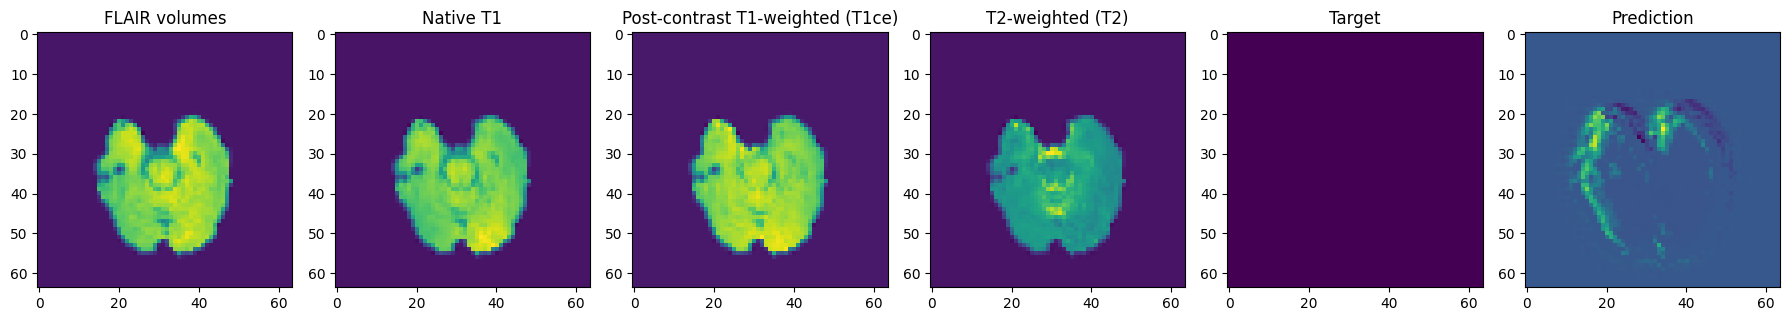

../../../results/res-glorious-dream-24/img/img_e1_b0.npy 1144.3062


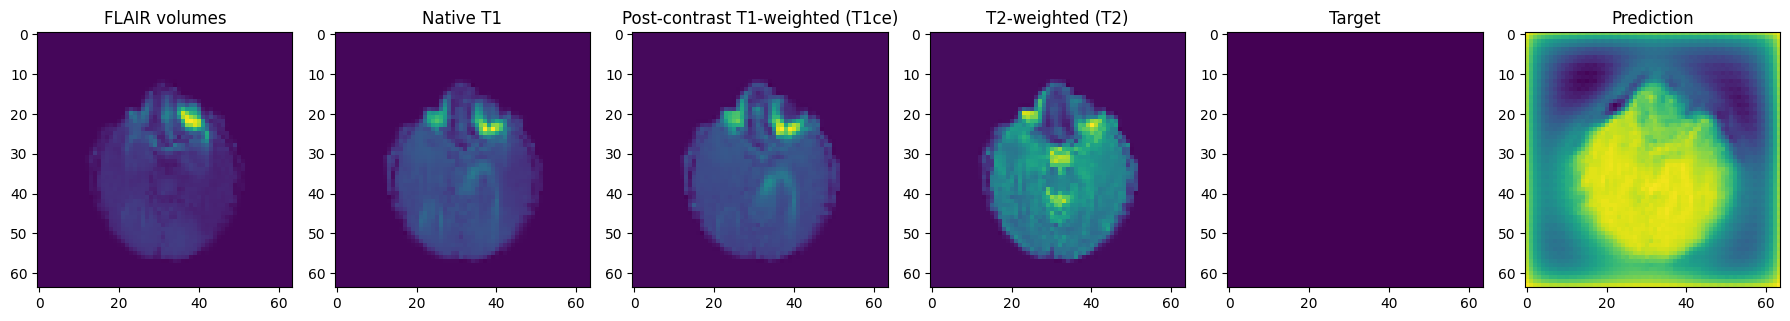

../../../results/res-glorious-dream-24/img/img_e1_b8.npy 1144.3062


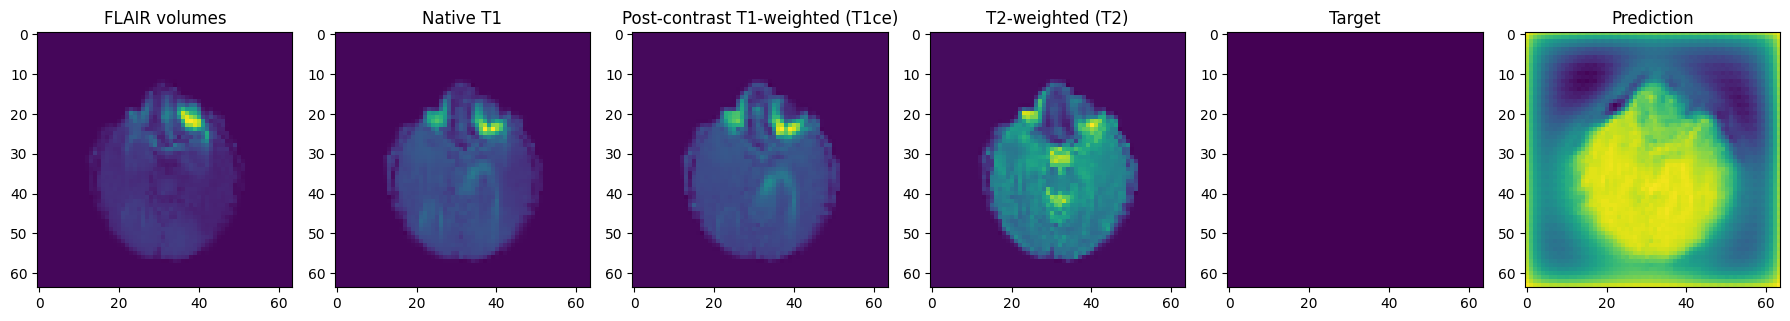

../../../results/res-glorious-dream-24/img/img_e2_b0.npy 224.9288


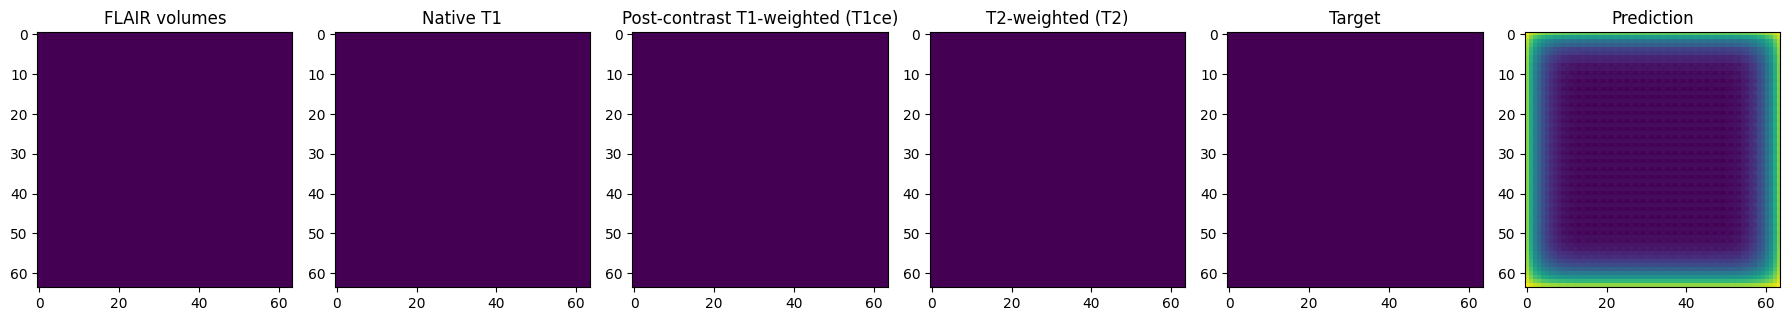

../../../results/res-glorious-dream-24/img/img_e2_b8.npy 224.9288


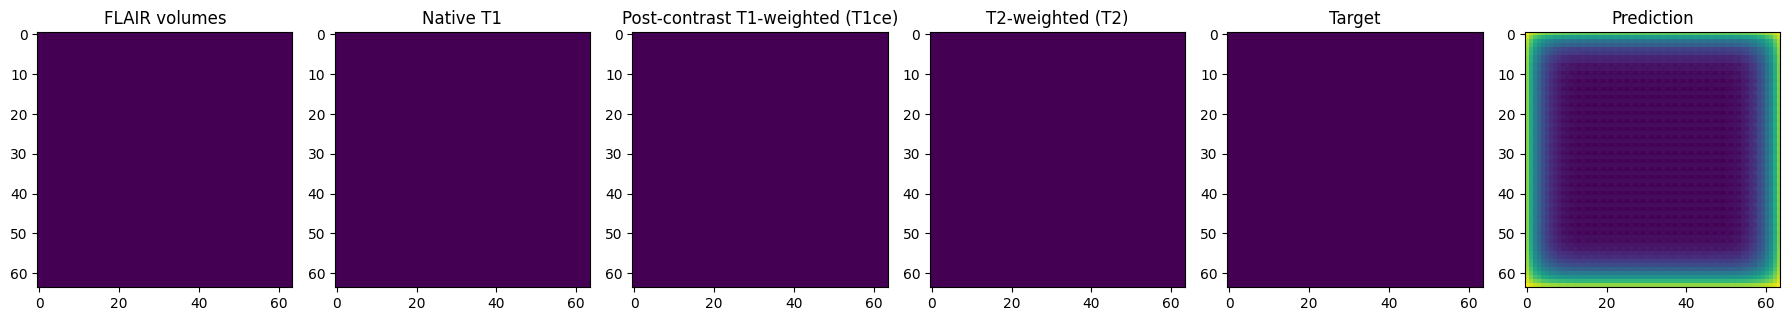

../../../results/res-glorious-dream-24/img/img_e3_b0.npy 555.86615


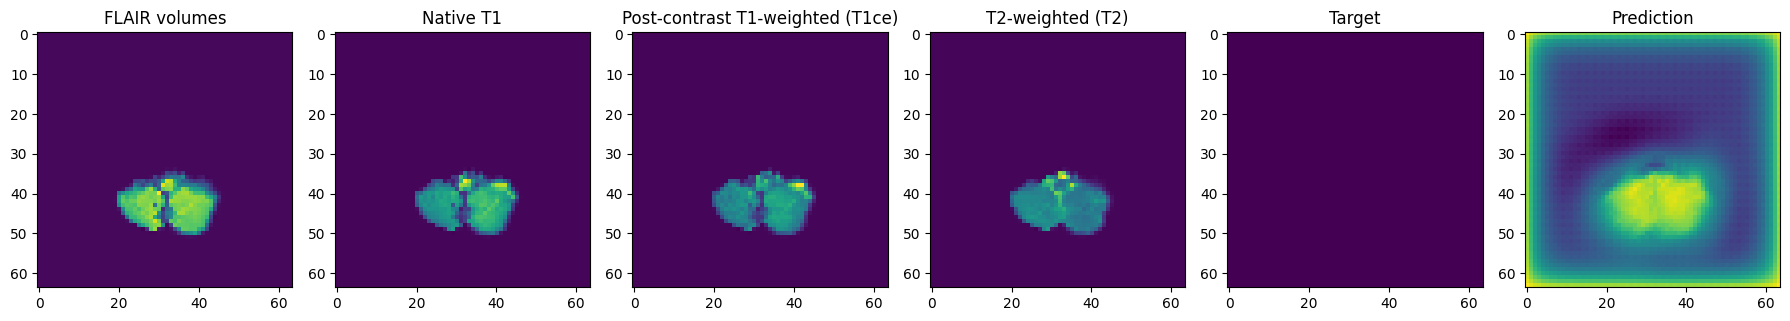

../../../results/res-glorious-dream-24/img/img_e3_b8.npy 555.86615


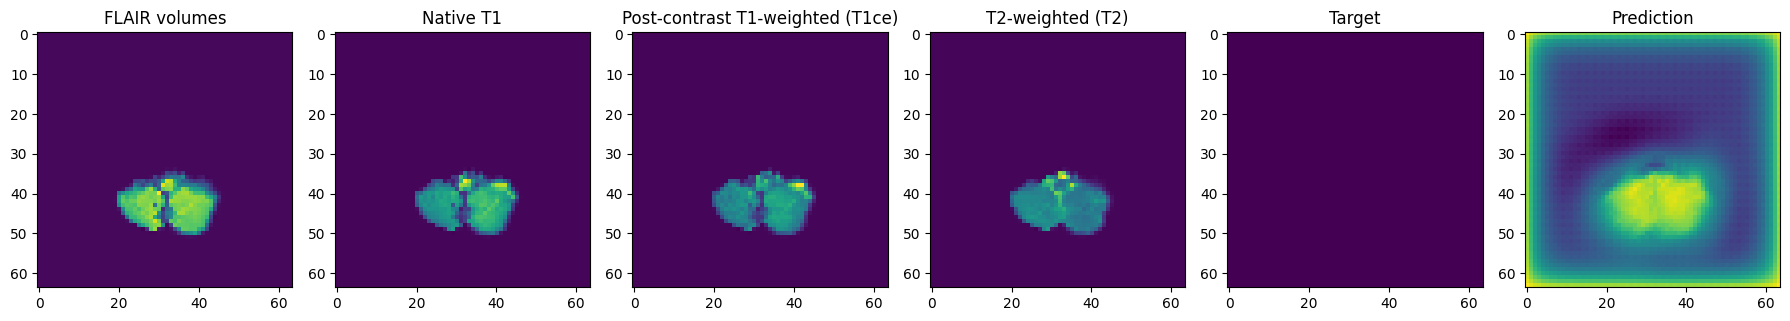

../../../results/res-glorious-dream-24/img/img_e4_b0.npy 1021.99805


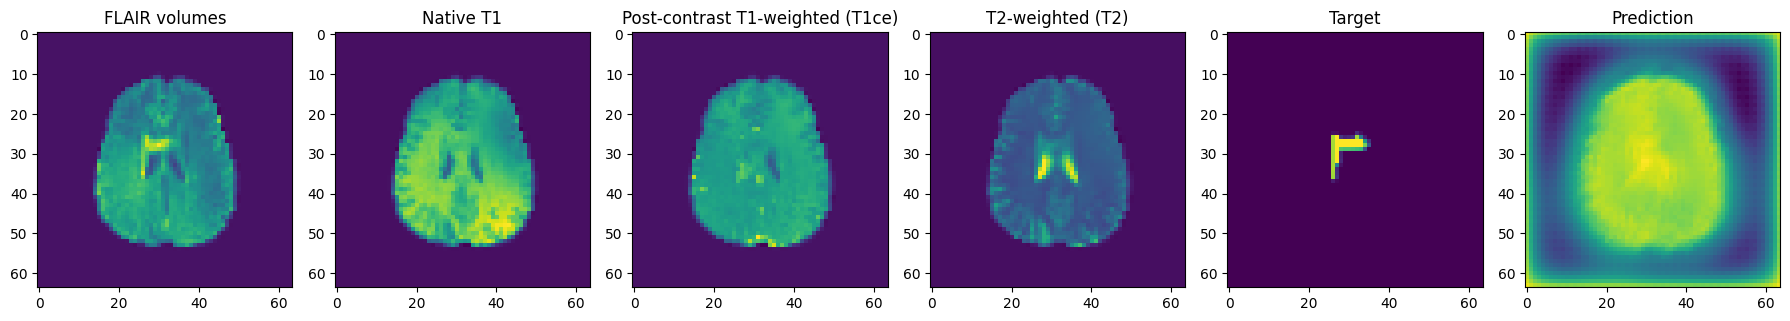

../../../results/res-glorious-dream-24/img/img_e4_b8.npy 1021.99805


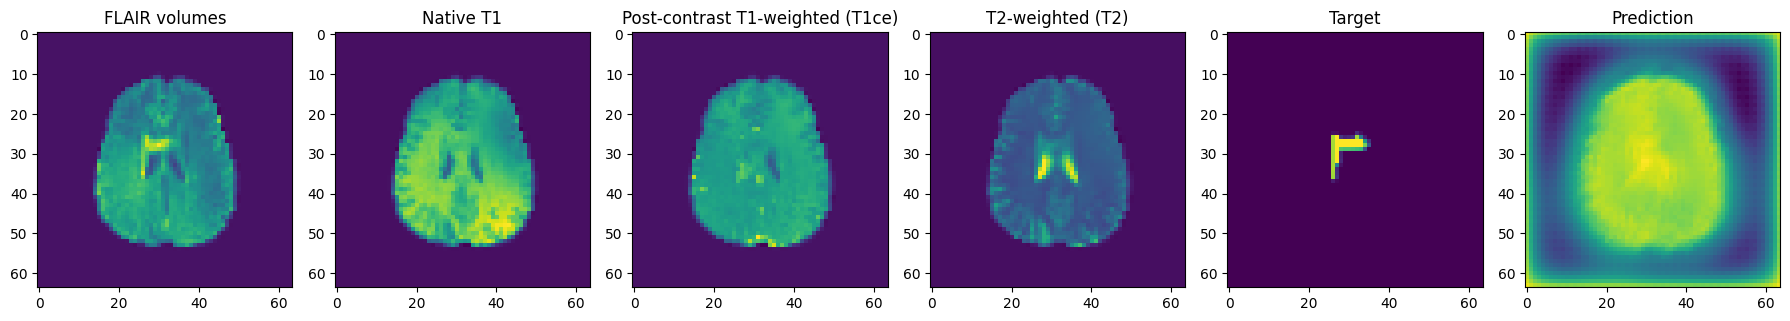

../../../results/res-glorious-dream-24/img/img_e5_b0.npy 619.06934


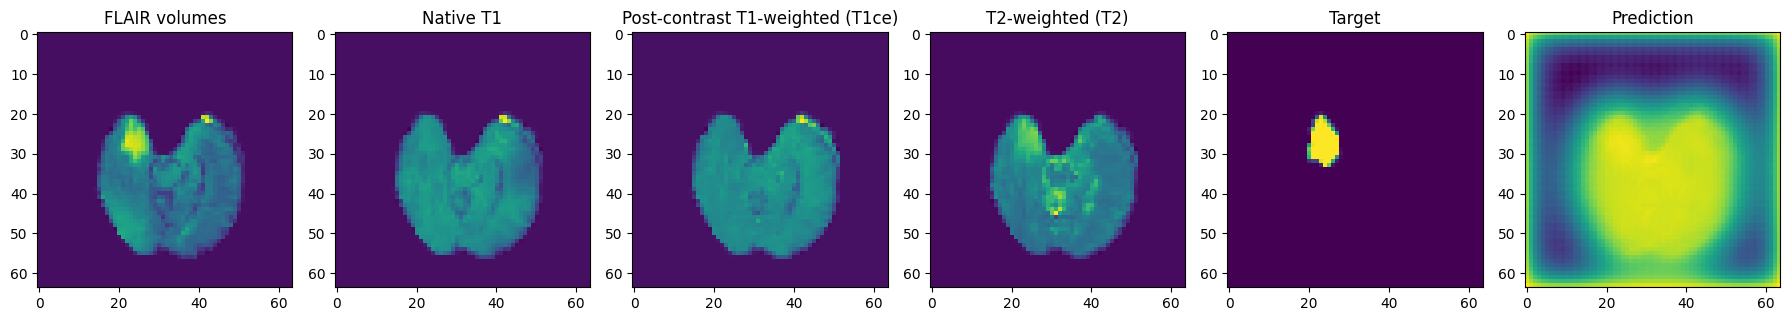

../../../results/res-glorious-dream-24/img/img_e5_b8.npy 619.06934


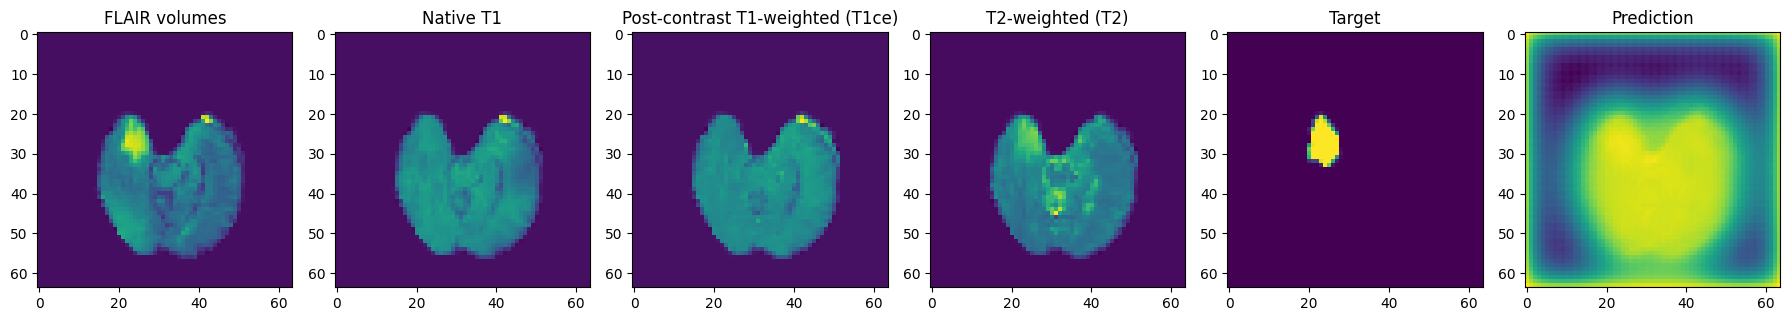

../../../results/res-glorious-dream-24/img/img_e6_b0.npy 847.5298


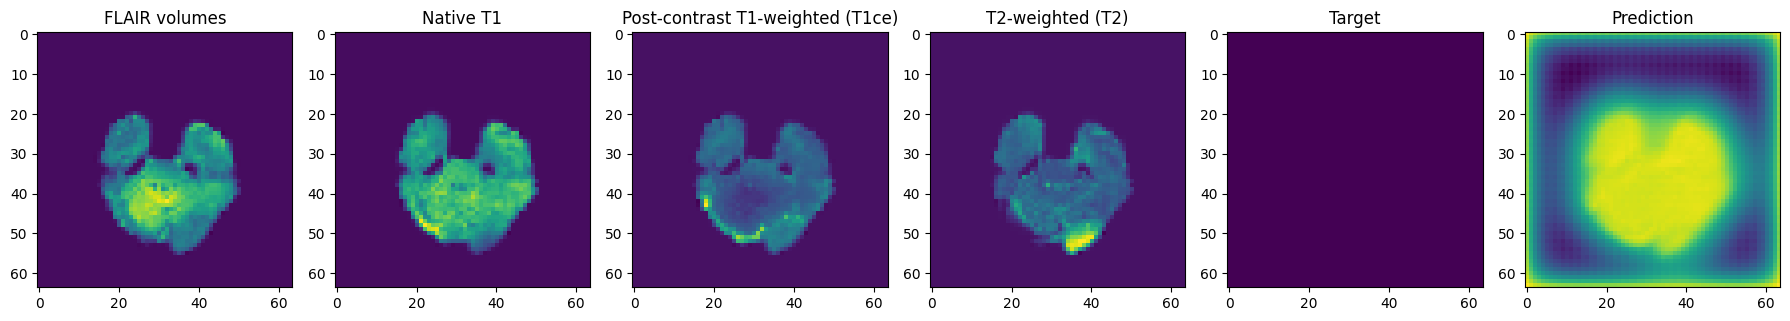

../../../results/res-glorious-dream-24/img/img_e6_b8.npy 847.5298


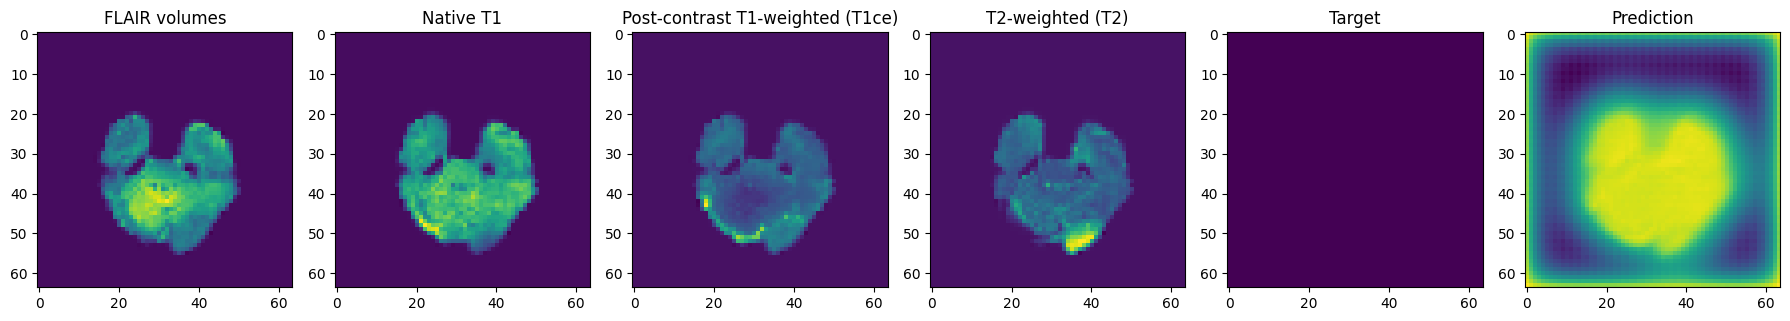

../../../results/res-glorious-dream-24/img/img_e7_b0.npy 1076.6985


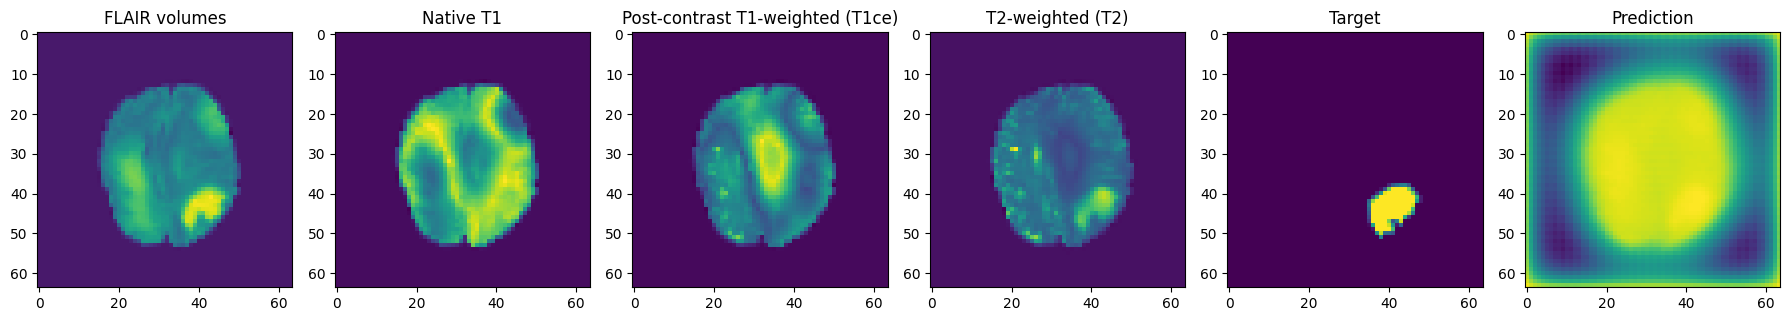

../../../results/res-glorious-dream-24/img/img_e7_b8.npy 1076.6985


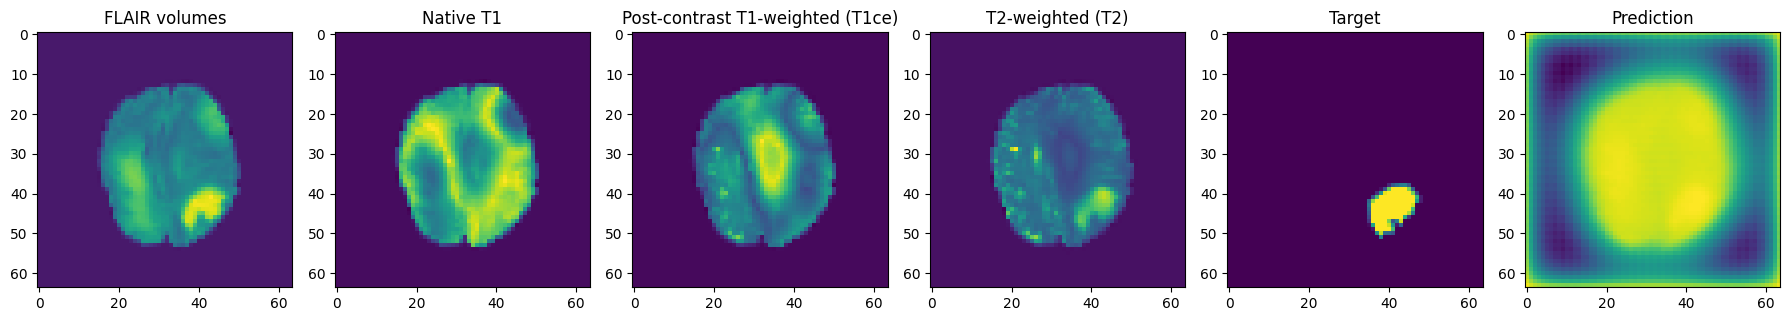

../../../results/res-glorious-dream-24/img/img_e8_b0.npy 1508.6006


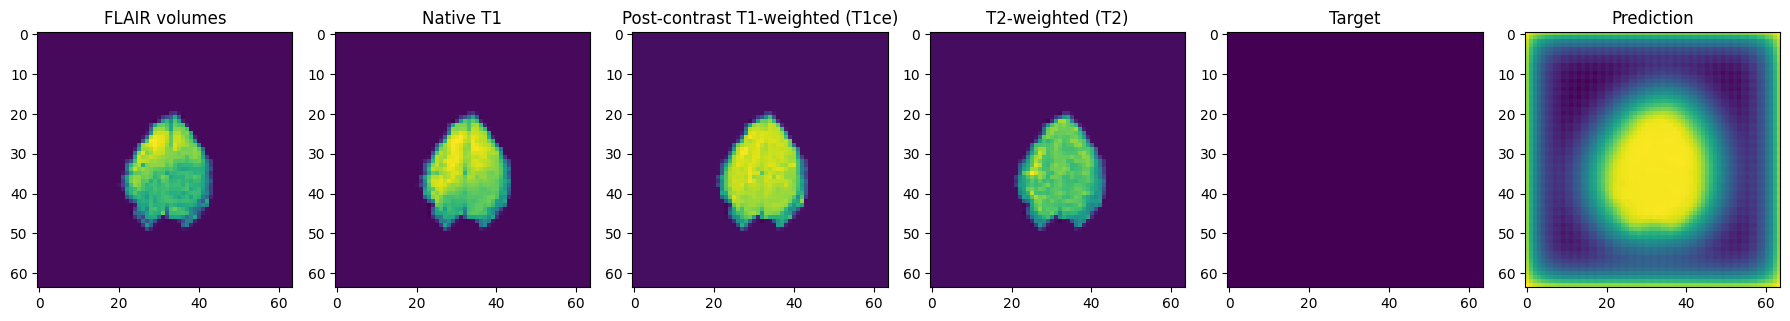

../../../results/res-glorious-dream-24/img/img_e8_b8.npy 1508.6006


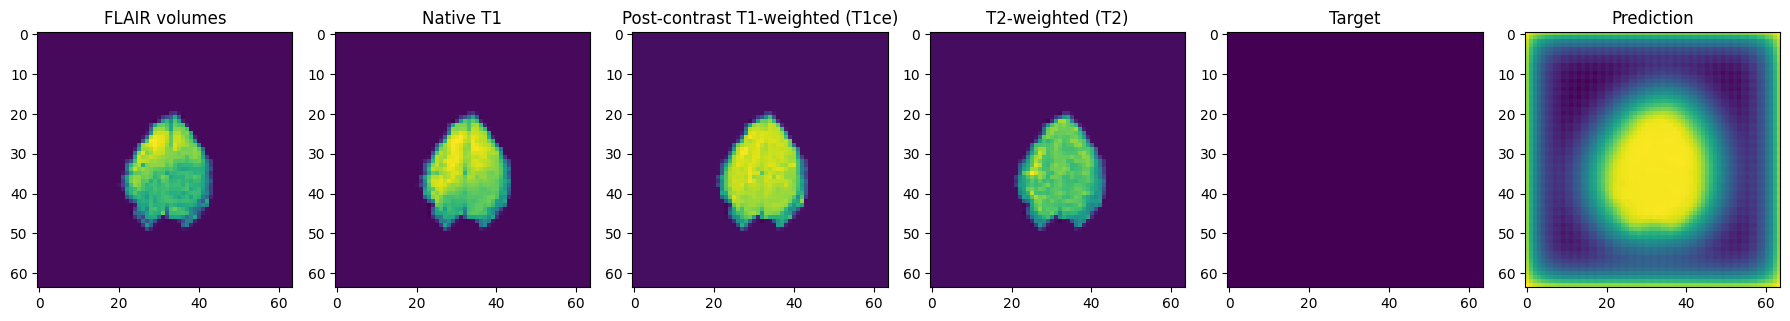

../../../results/res-glorious-dream-24/img/img_e9_b0.npy 938.5924


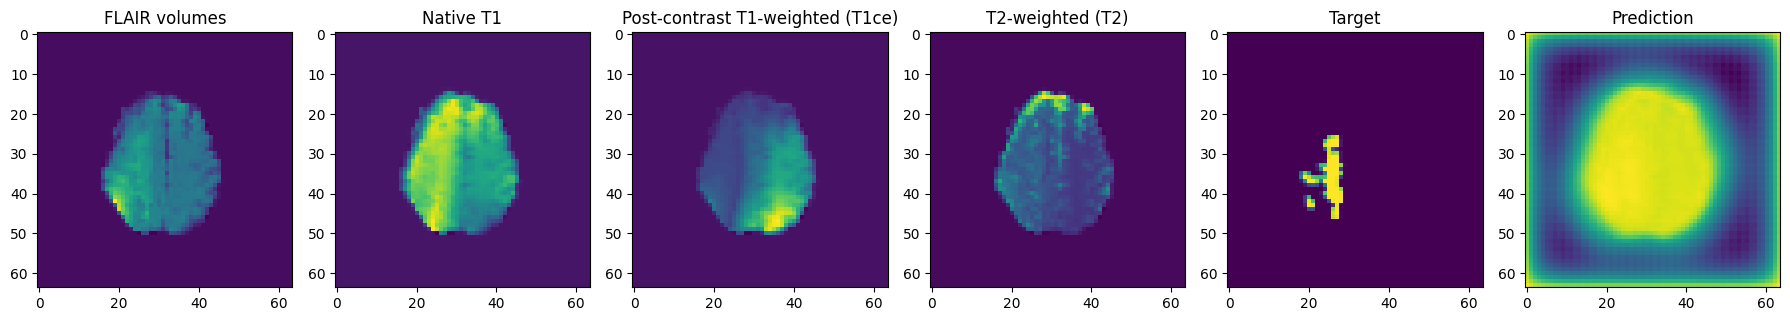

../../../results/res-glorious-dream-24/img/img_e9_b8.npy 938.5924


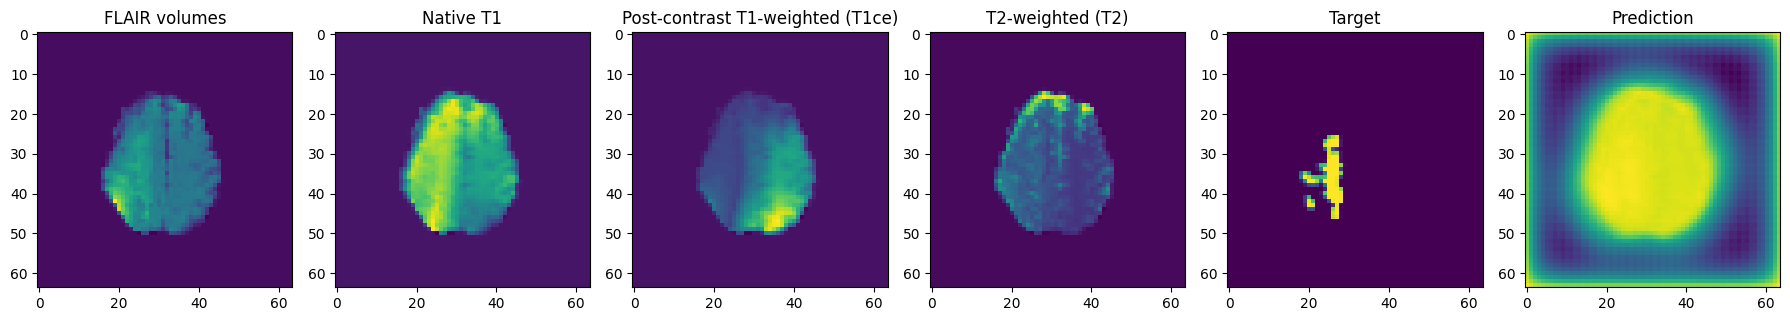

../../../results/res-glorious-dream-24/img/img_e10_b0.npy 1309.717


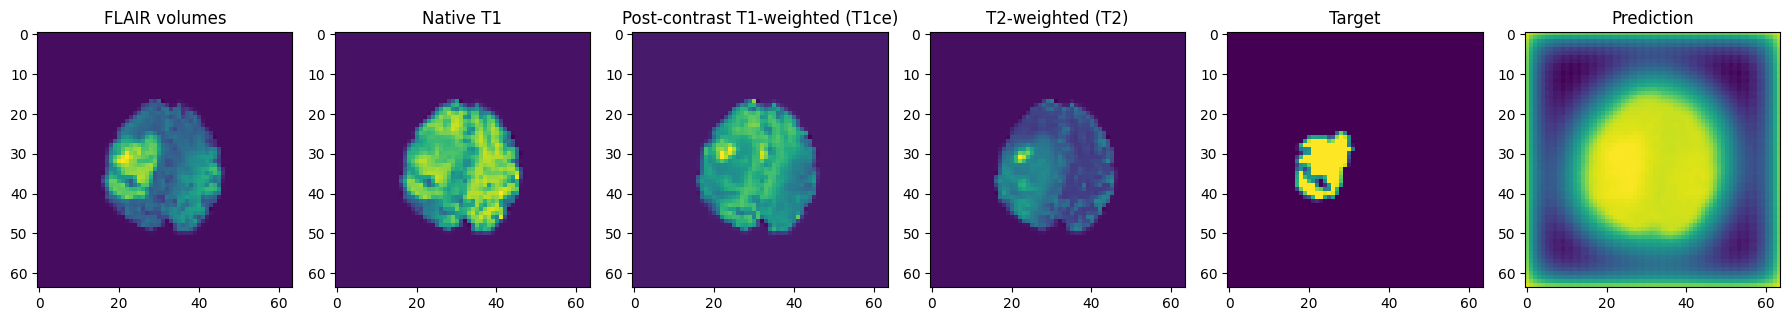

../../../results/res-glorious-dream-24/img/img_e10_b8.npy 1309.717


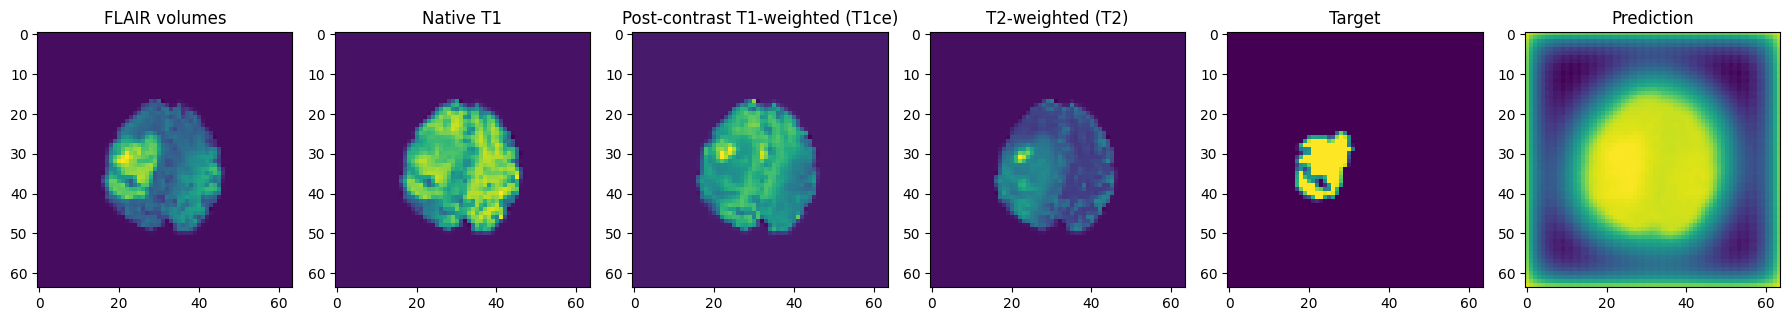

../../../results/res-glorious-dream-24/img/img_e11_b0.npy 592.7857


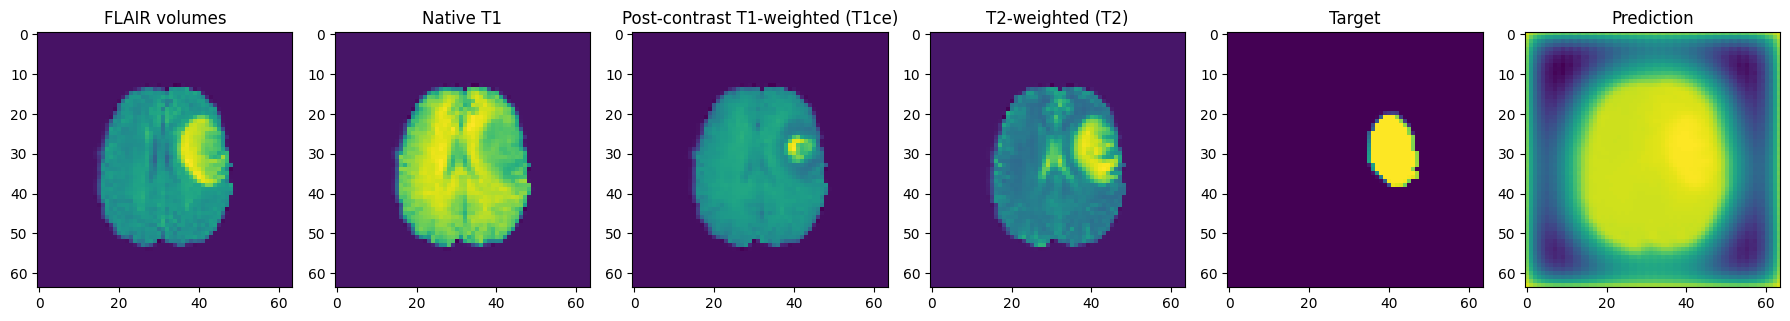

../../../results/res-glorious-dream-24/img/img_e11_b8.npy 592.7857


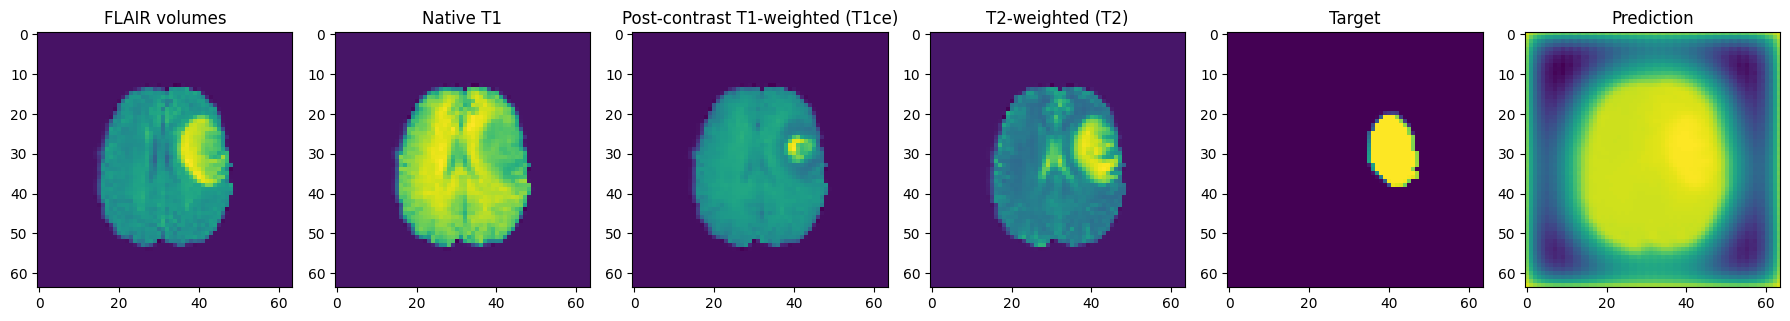

../../../results/res-glorious-dream-24/img/img_e12_b0.npy 1024.824


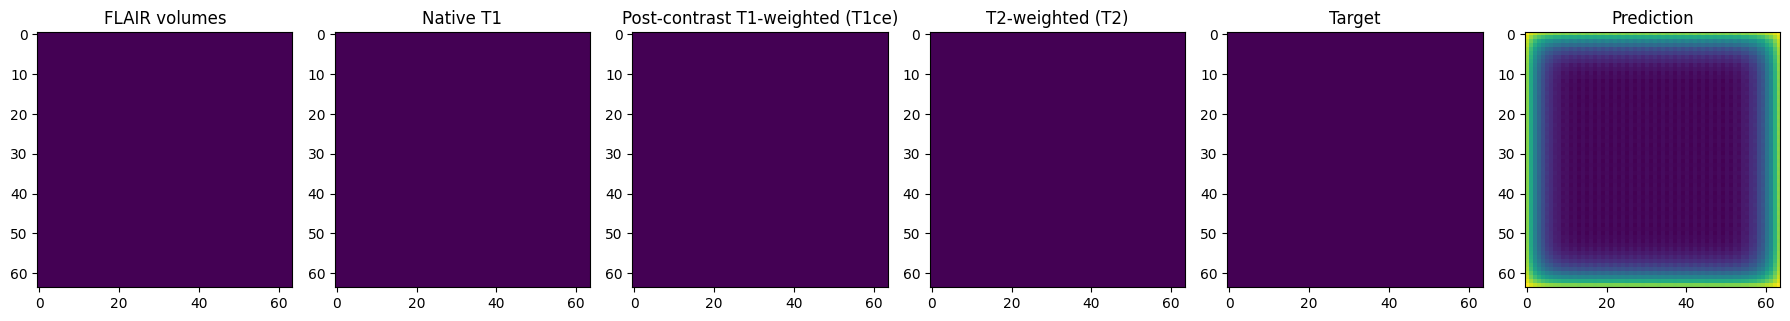

../../../results/res-glorious-dream-24/img/img_e12_b8.npy 1024.824


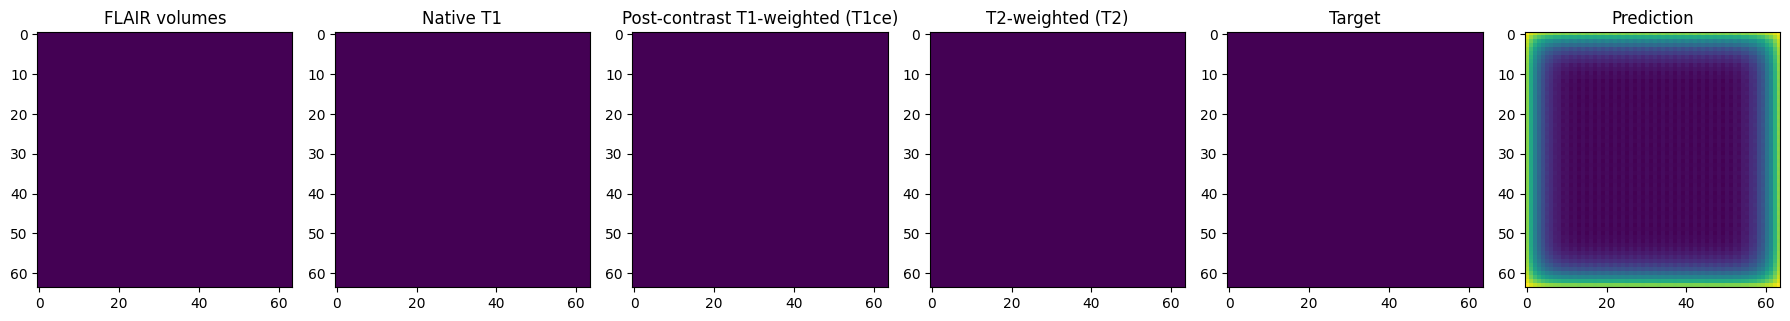

../../../results/res-glorious-dream-24/img/img_e13_b0.npy 1046.6516


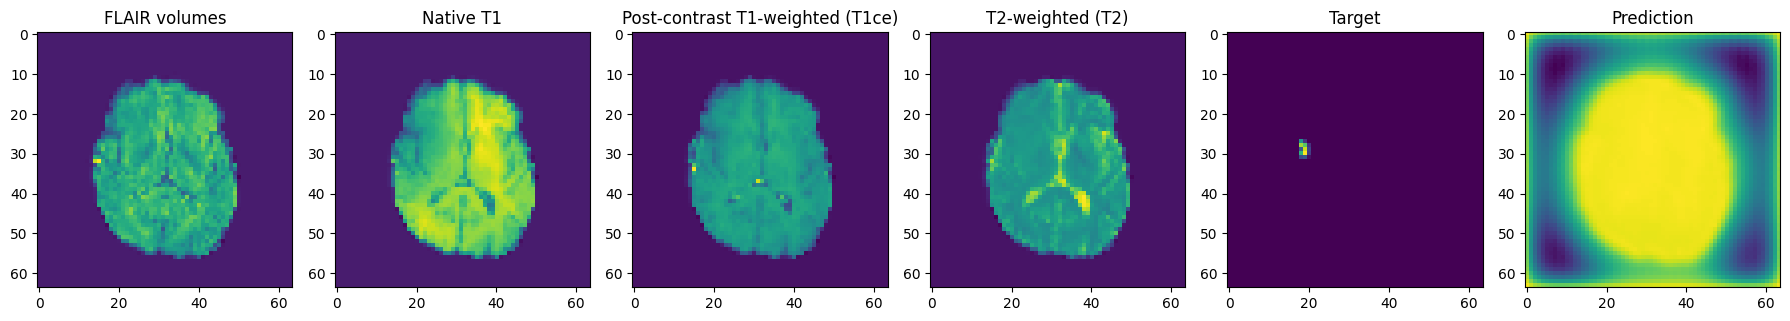

../../../results/res-glorious-dream-24/img/img_e13_b8.npy 1046.6516


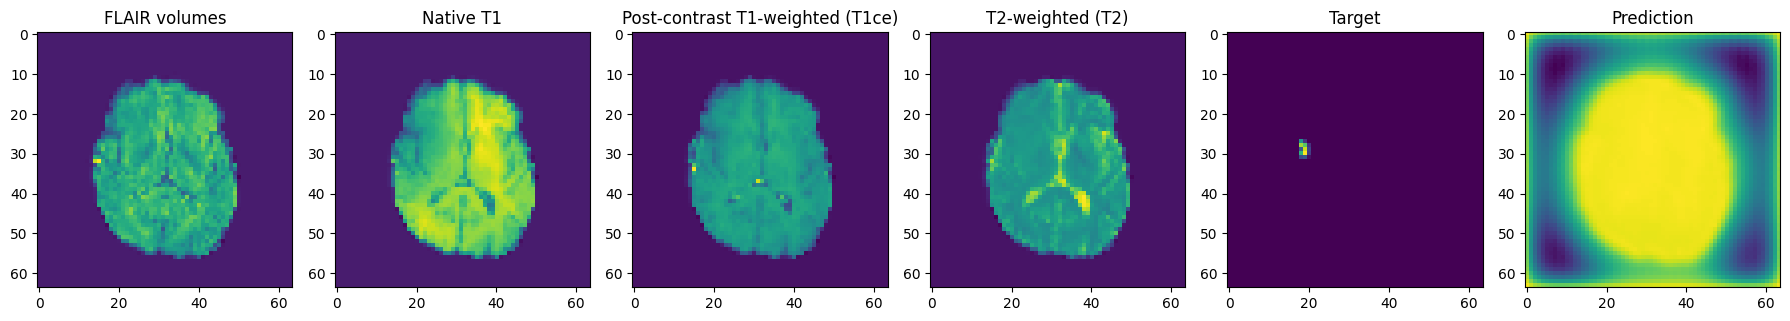

../../../results/res-glorious-dream-24/img/img_e14_b0.npy 559.0594


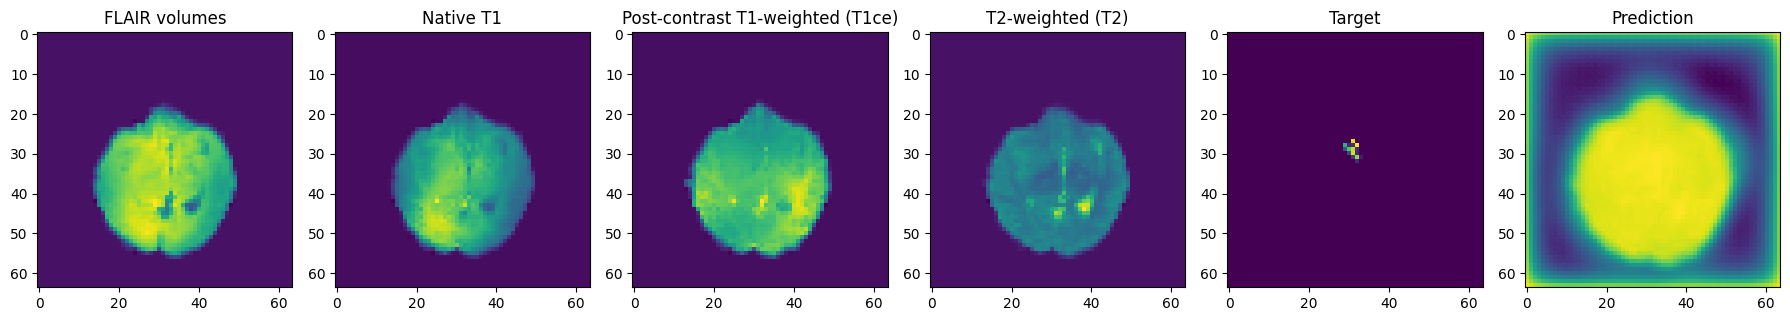

../../../results/res-glorious-dream-24/img/img_e14_b8.npy 559.0594


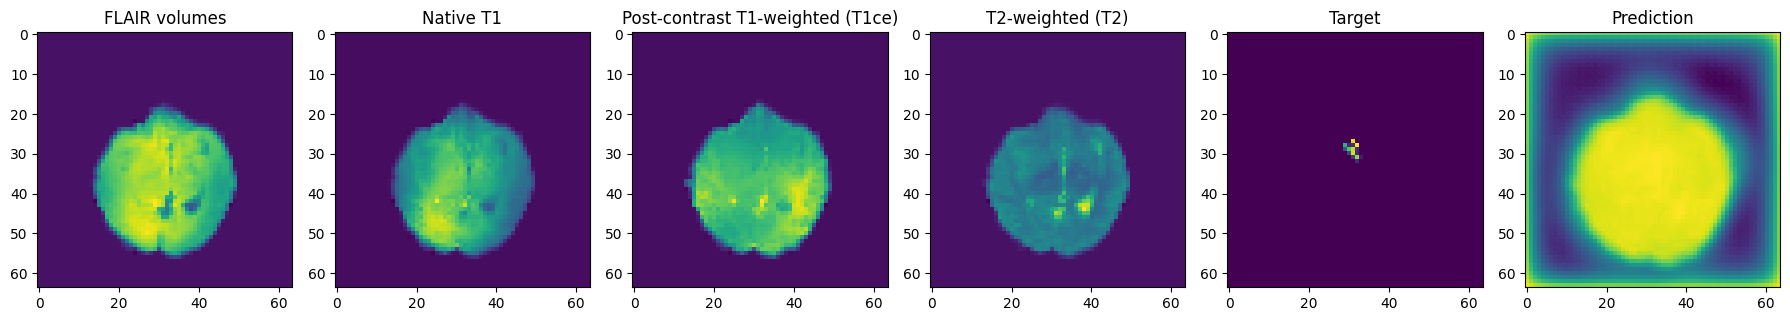

../../../results/res-glorious-dream-24/img/img_e15_b0.npy 1135.158


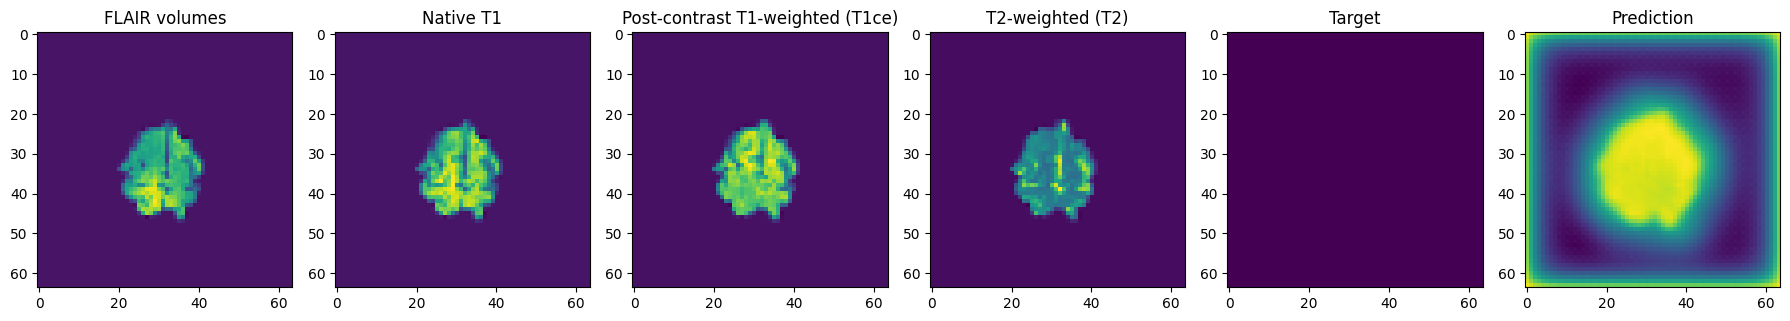

../../../results/res-glorious-dream-24/img/img_e15_b8.npy 1135.158


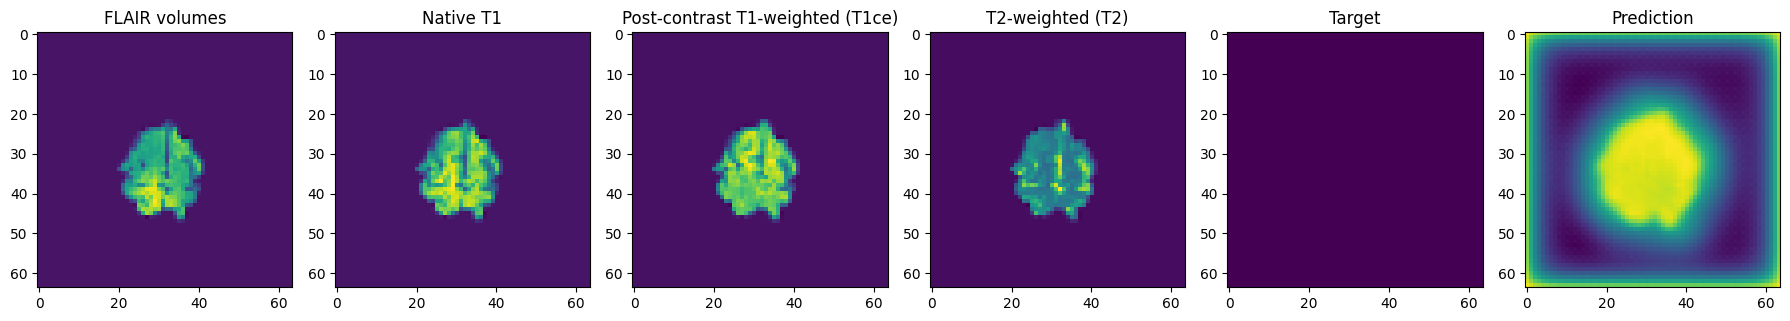

../../../results/res-glorious-dream-24/img/img_e16_b0.npy 152.0848


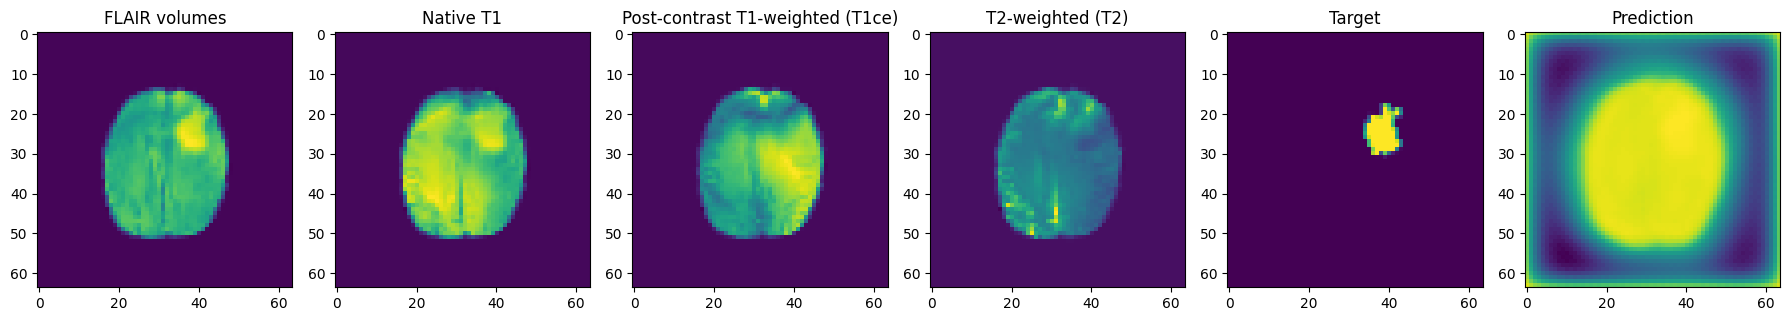

../../../results/res-glorious-dream-24/img/img_e16_b8.npy 152.0848


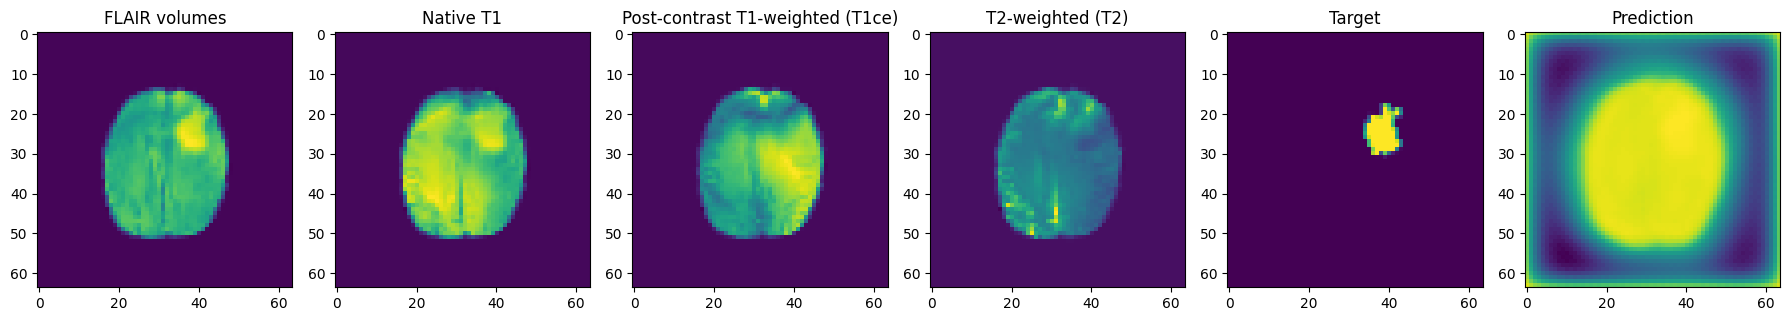

../../../results/res-glorious-dream-24/img/img_e17_b0.npy 798.48755


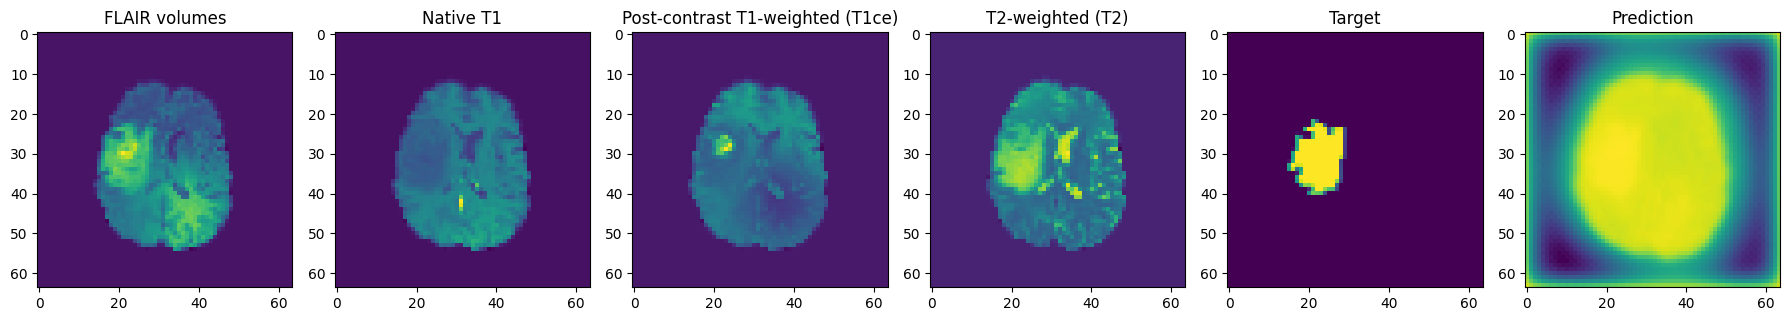

../../../results/res-glorious-dream-24/img/img_e17_b8.npy 798.48755


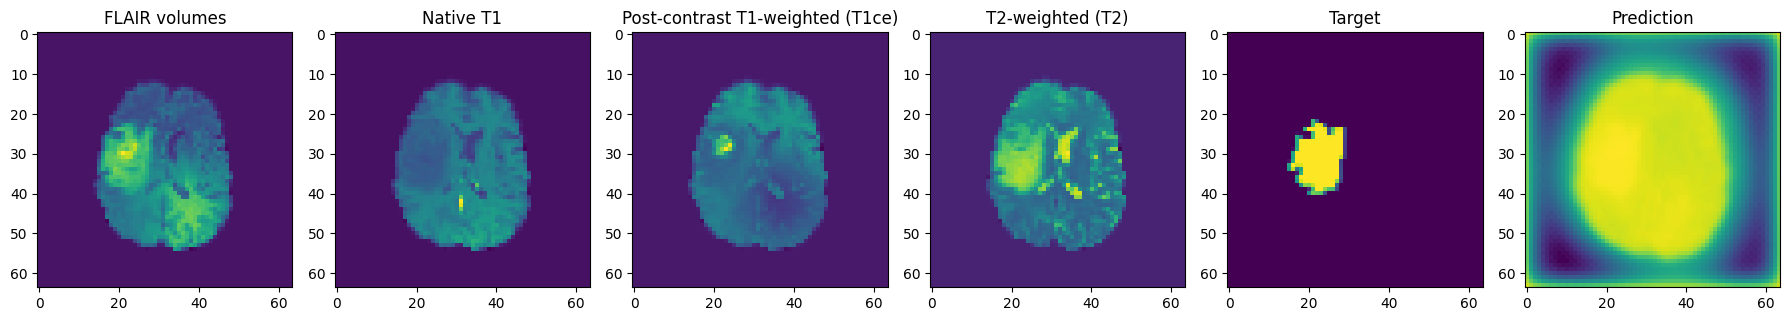

../../../results/res-glorious-dream-24/img/img_e18_b0.npy 803.0192


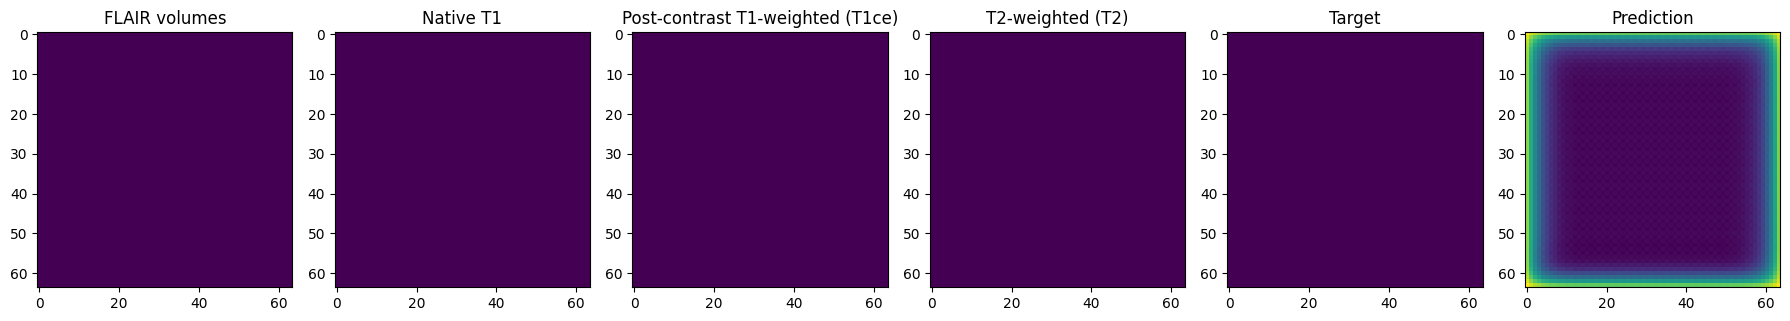

../../../results/res-glorious-dream-24/img/img_e18_b8.npy 803.0192


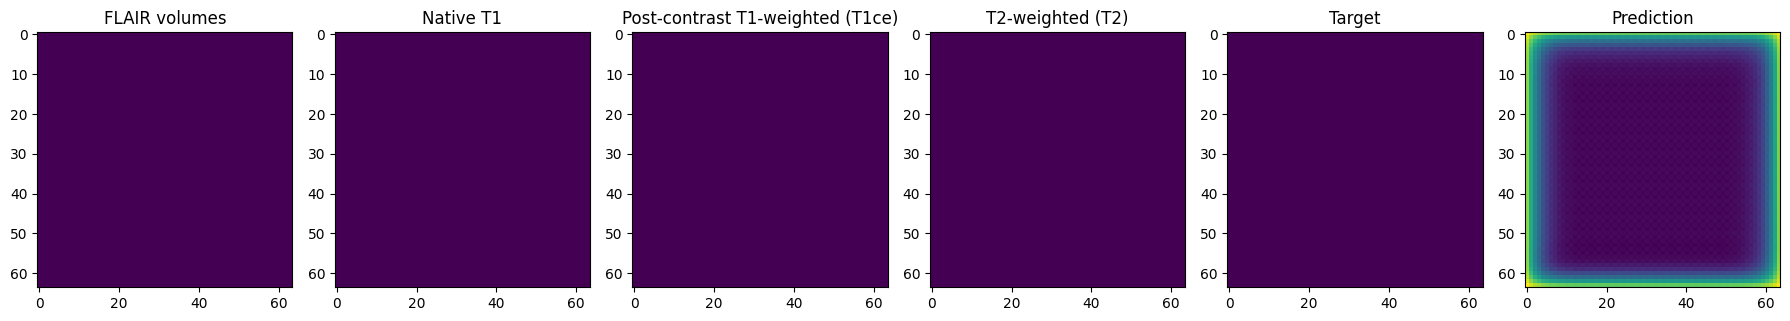

../../../results/res-glorious-dream-24/img/img_e19_b0.npy 621.11127


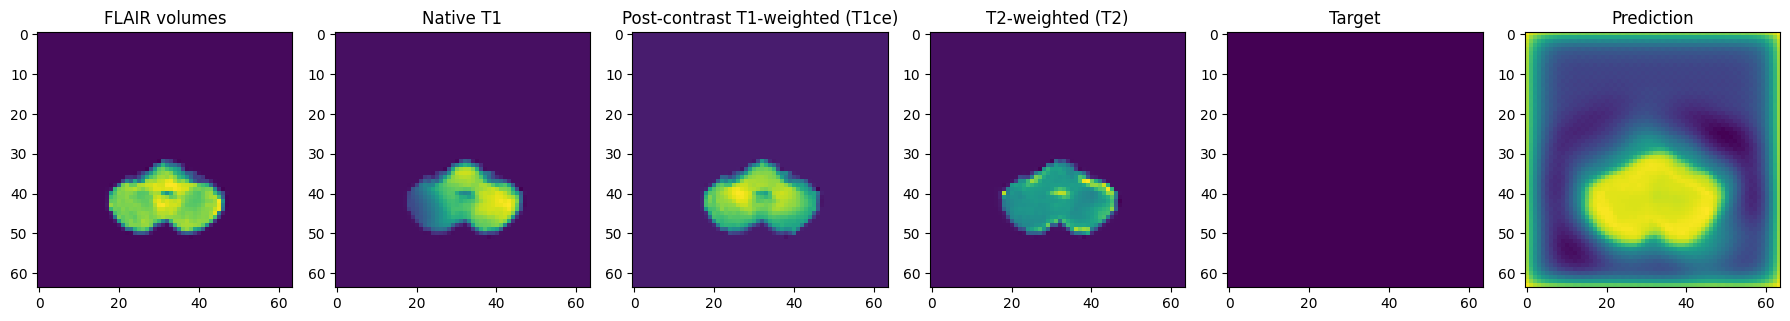

../../../results/res-glorious-dream-24/img/img_e19_b8.npy 621.11127


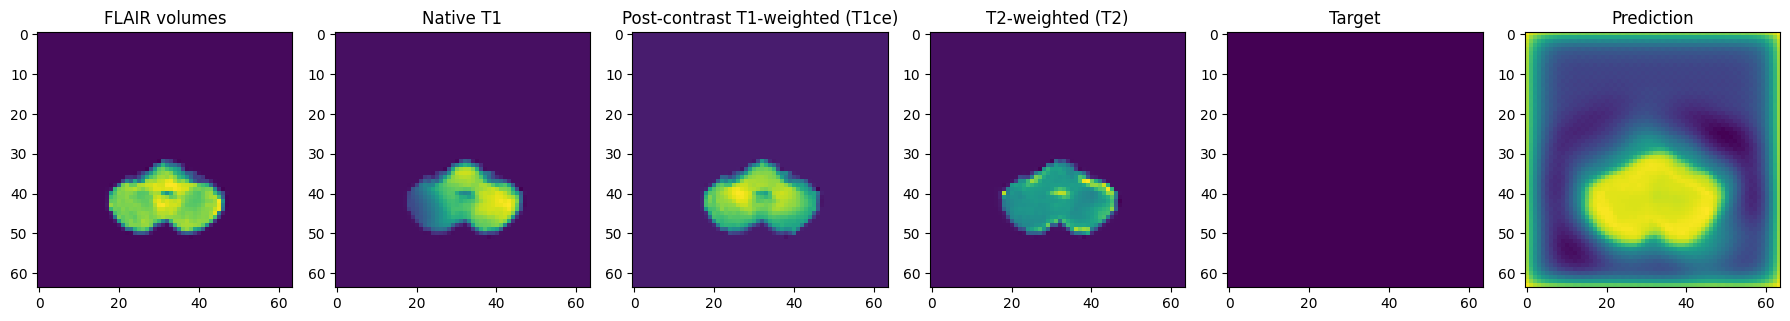

../../../results/res-glorious-dream-24/img/img_e20_b0.npy 835.8762


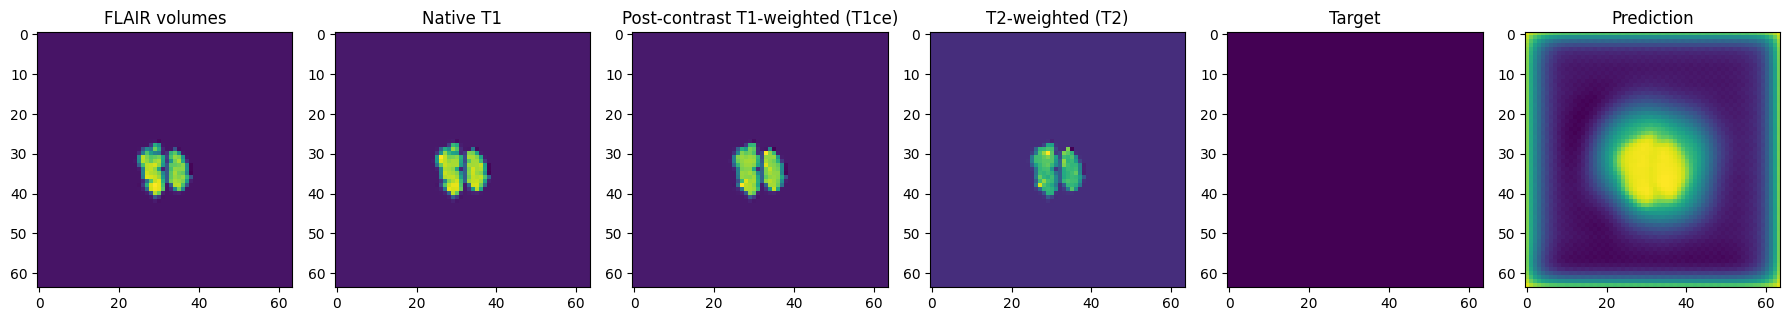

../../../results/res-glorious-dream-24/img/img_e20_b8.npy 835.8762


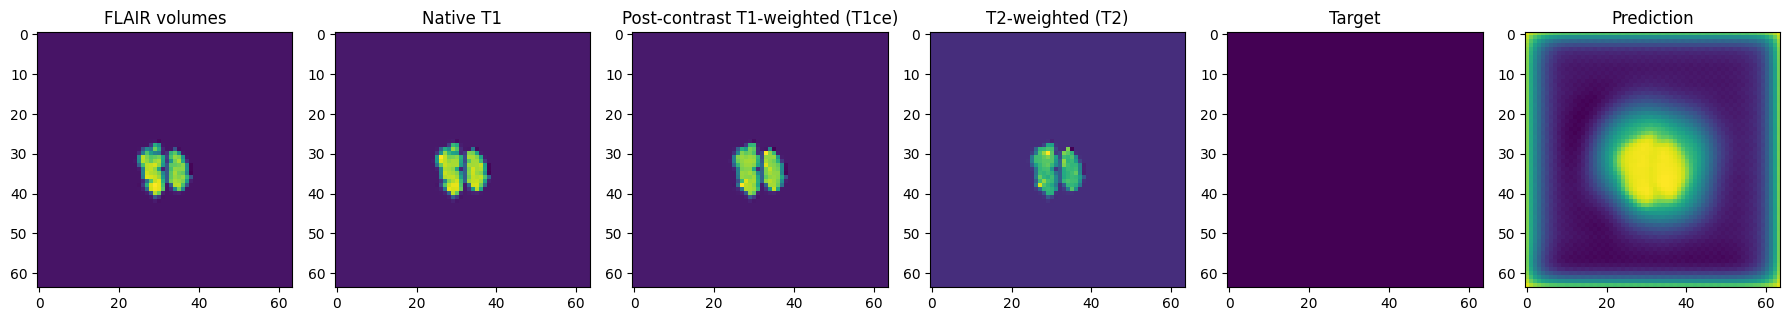

../../../results/res-glorious-dream-24/img/img_e21_b0.npy 1051.4106


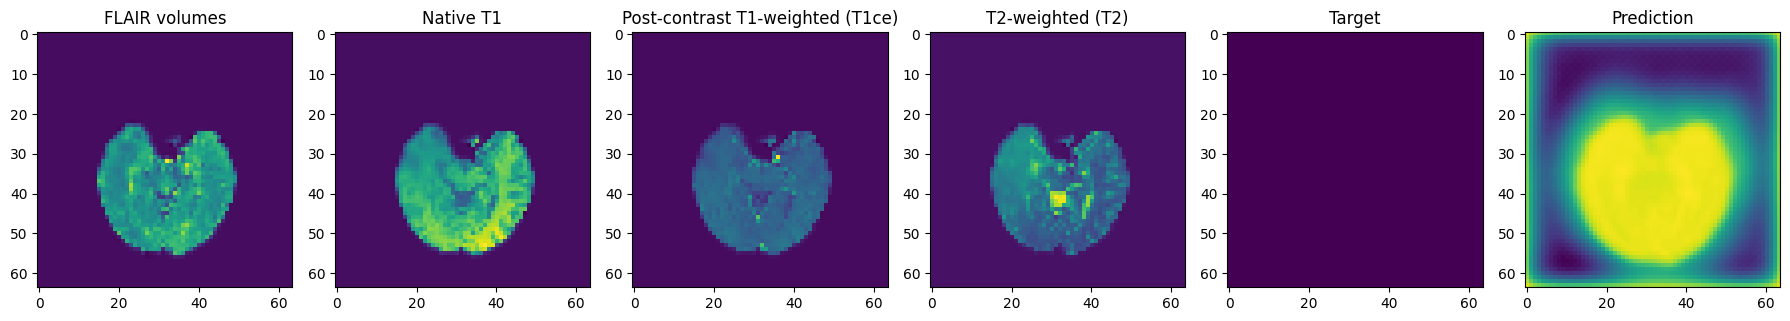

../../../results/res-glorious-dream-24/img/img_e21_b8.npy 1051.4106


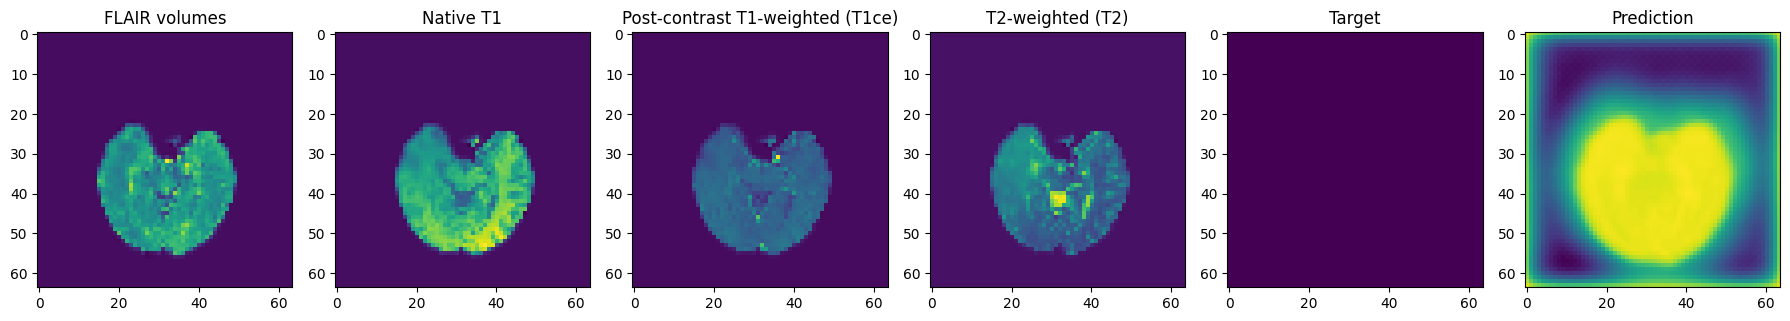

../../../results/res-glorious-dream-24/img/img_e22_b0.npy 630.5682


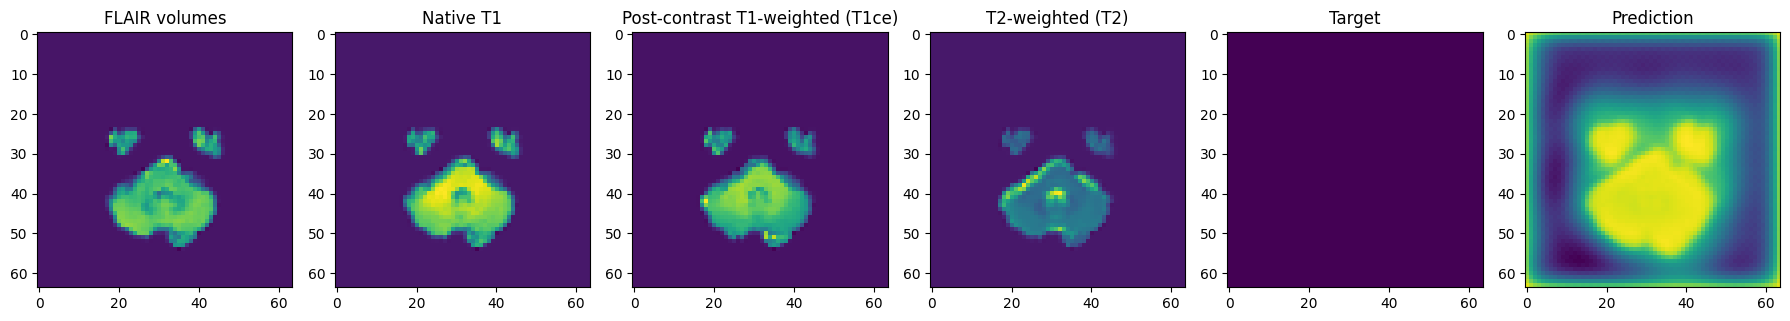

../../../results/res-glorious-dream-24/img/img_e22_b8.npy 630.5682


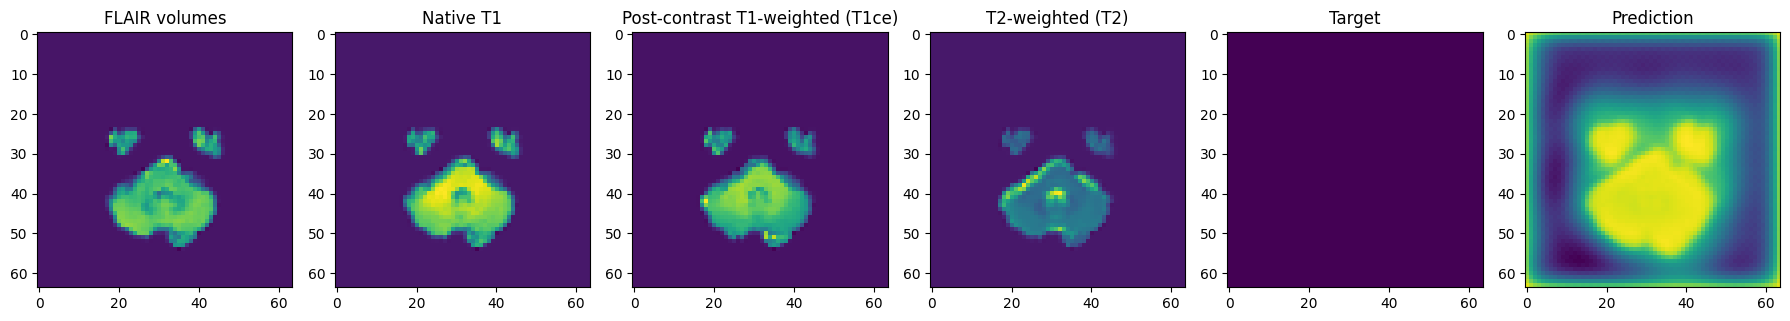

../../../results/res-glorious-dream-24/img/img_e23_b0.npy 674.5065


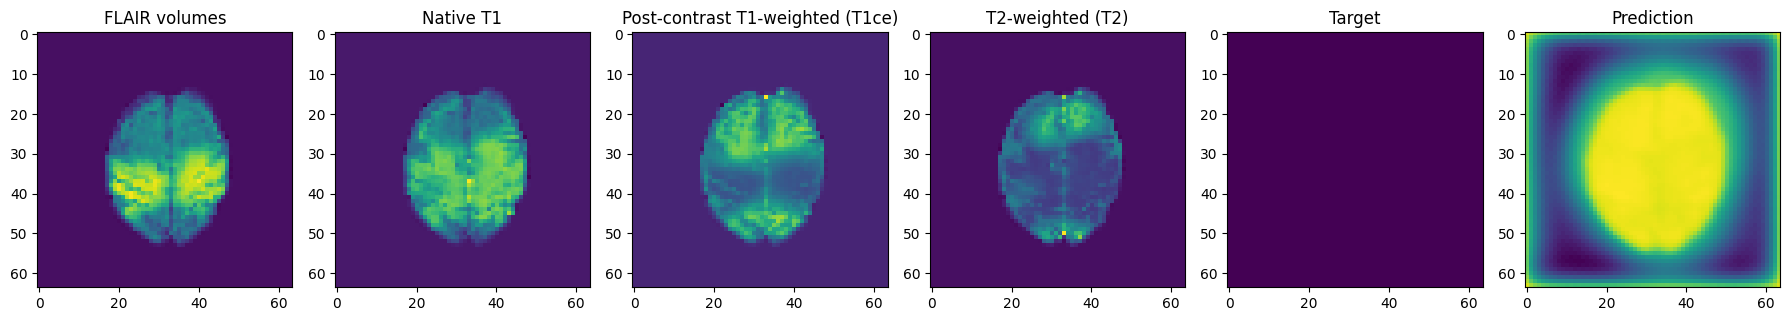

../../../results/res-glorious-dream-24/img/img_e23_b8.npy 674.5065


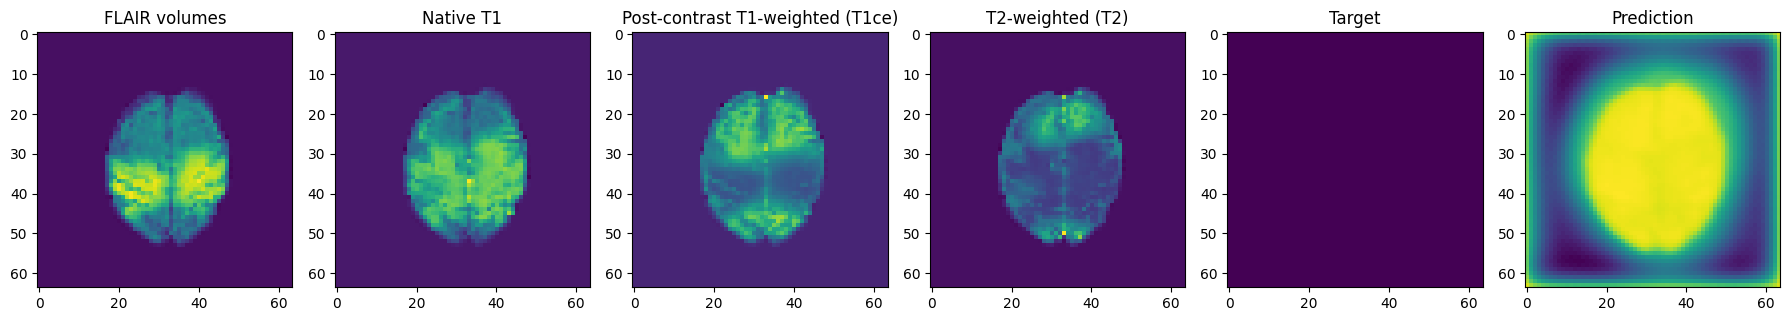

../../../results/res-glorious-dream-24/img/img_e24_b0.npy 966.0379


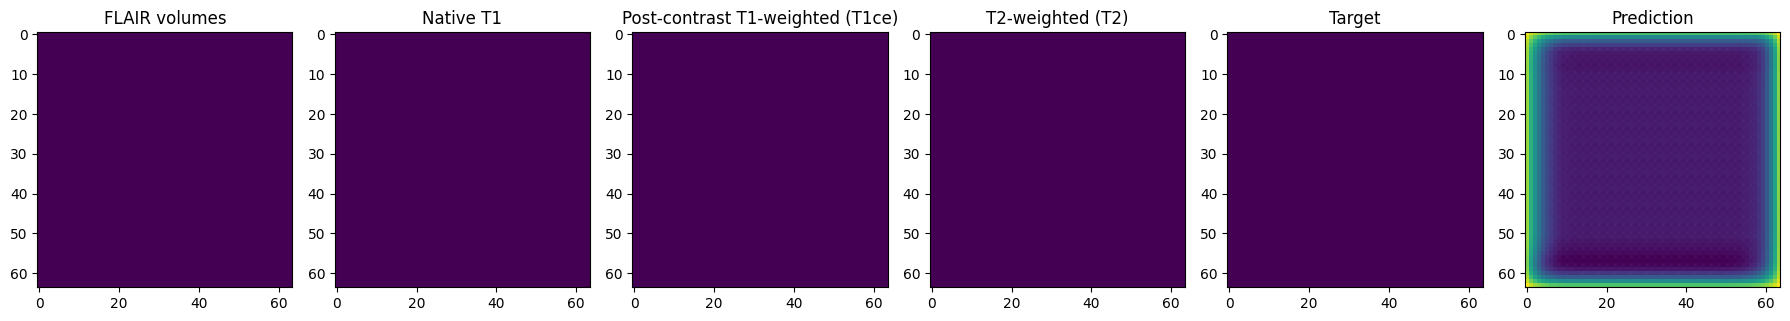

../../../results/res-glorious-dream-24/img/img_e24_b8.npy 966.0379


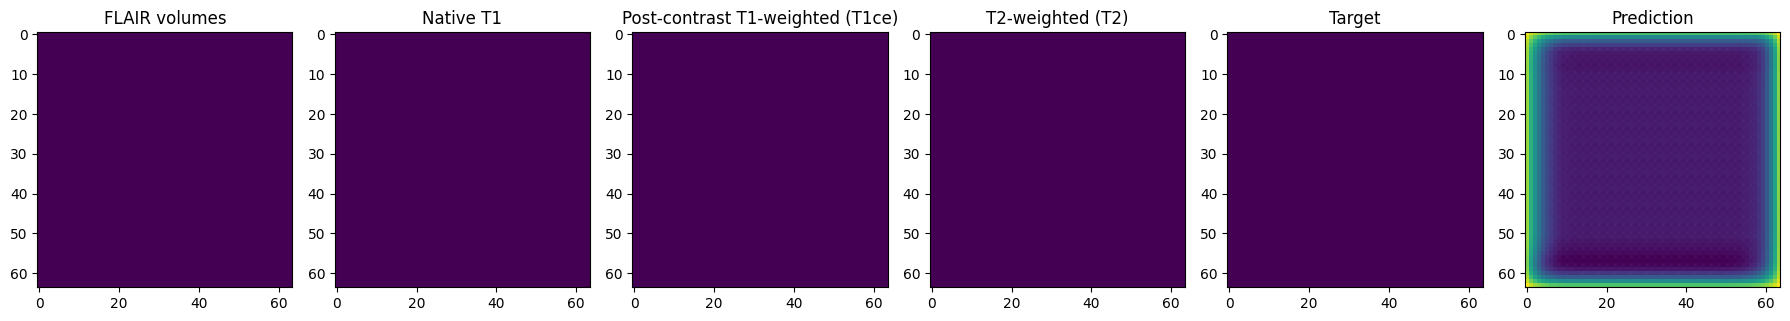

../../../results/res-glorious-dream-24/img/img_e25_b0.npy 669.5172


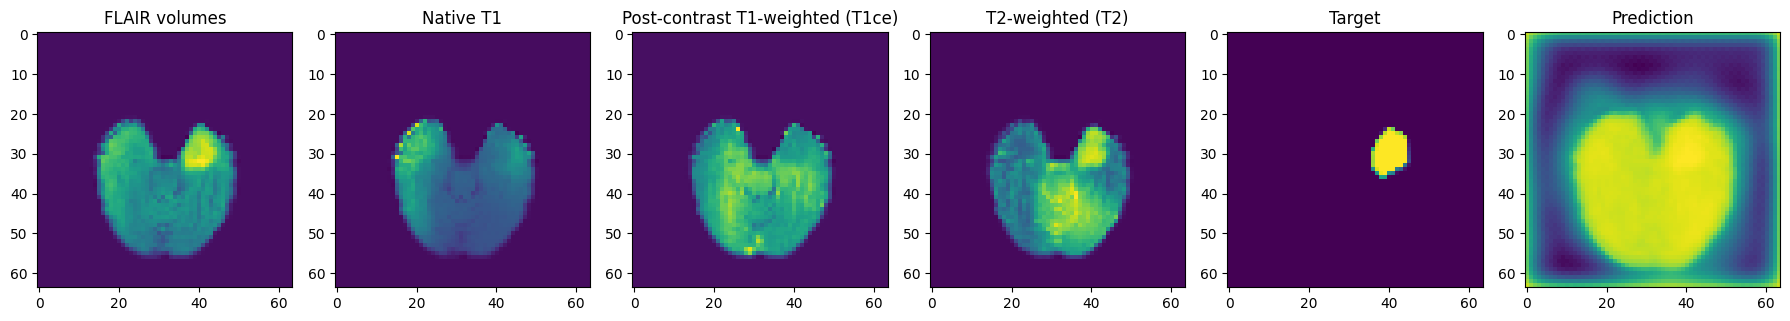

../../../results/res-glorious-dream-24/img/img_e25_b8.npy 669.5172


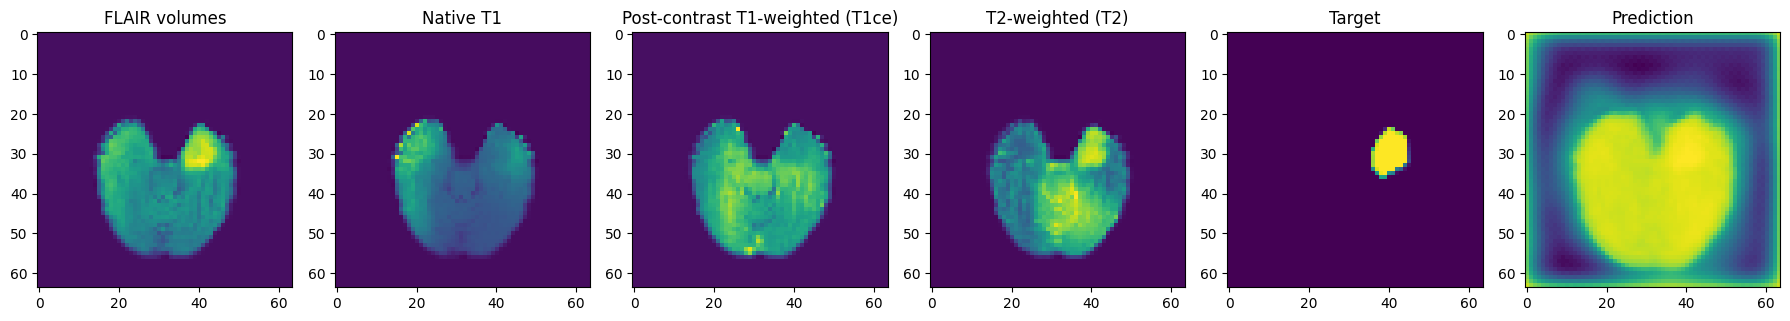

../../../results/res-glorious-dream-24/img/img_e26_b0.npy 968.5961


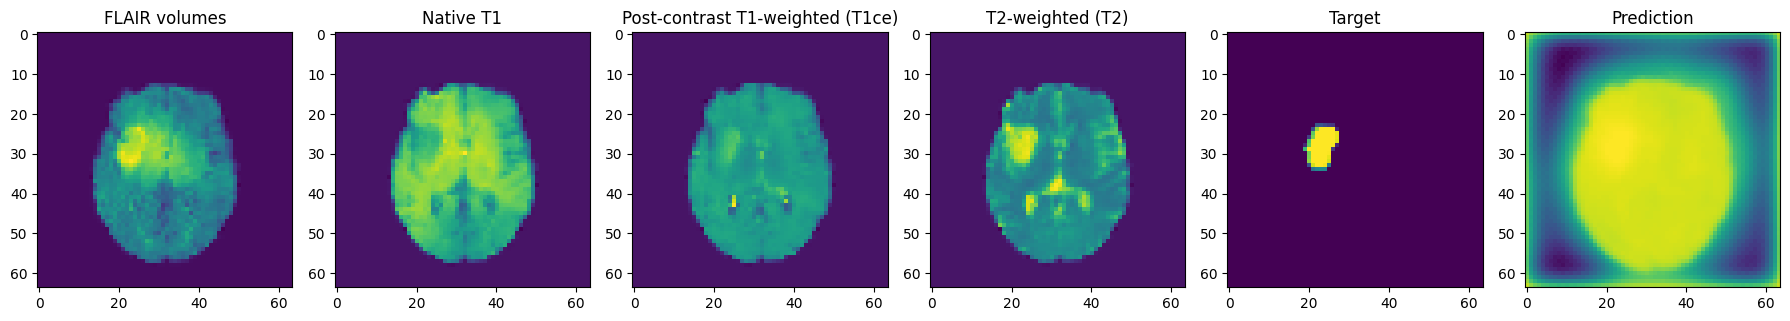

../../../results/res-glorious-dream-24/img/img_e26_b8.npy 968.5961


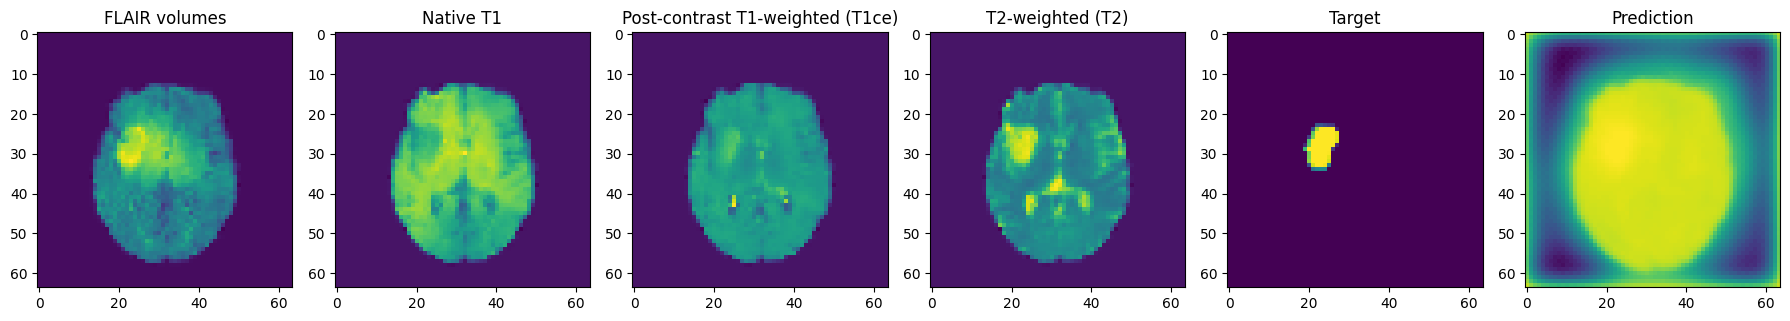

../../../results/res-glorious-dream-24/img/img_e27_b0.npy 869.1595


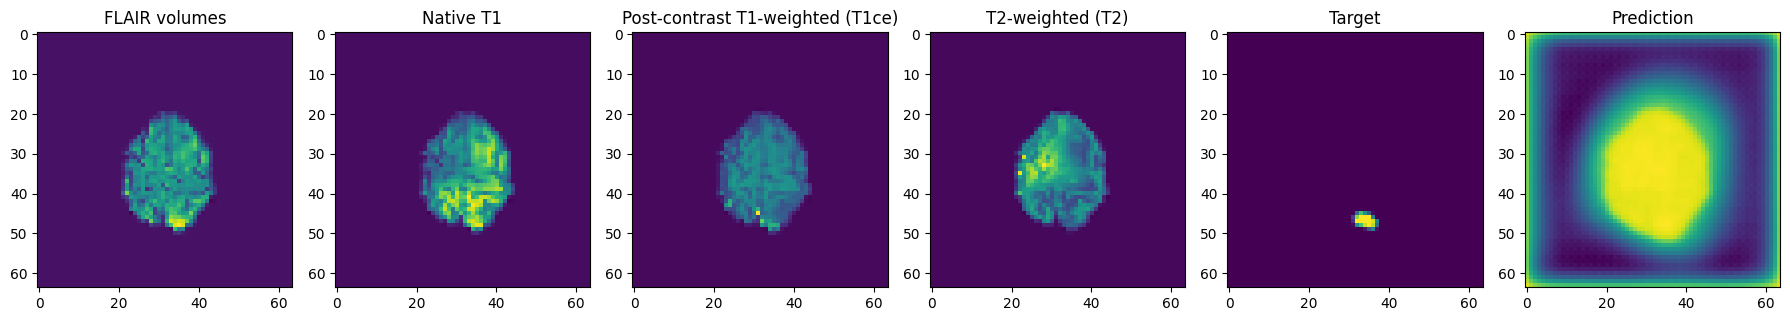

../../../results/res-glorious-dream-24/img/img_e27_b8.npy 869.1595


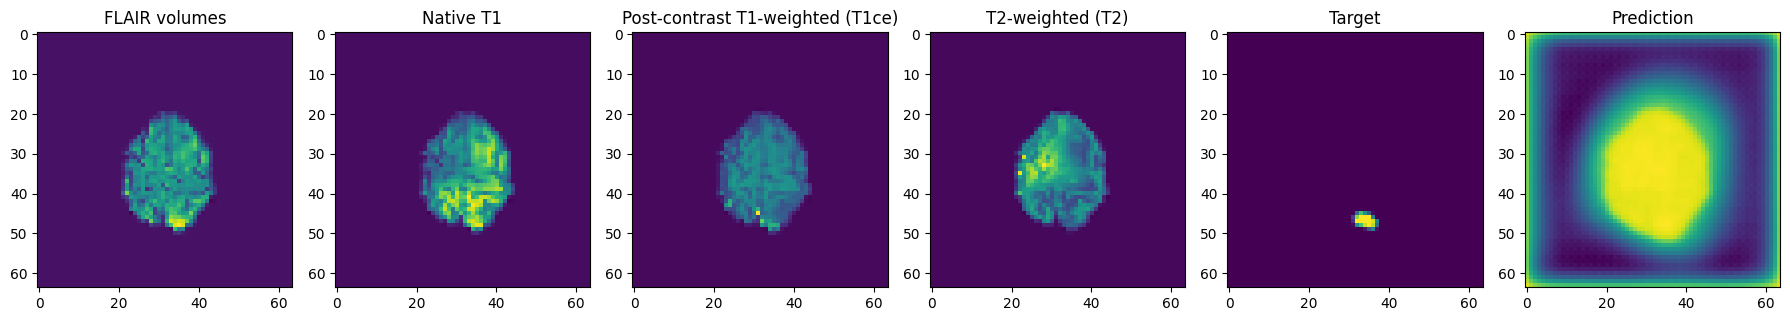

../../../results/res-glorious-dream-24/img/img_e28_b0.npy 1092.9299


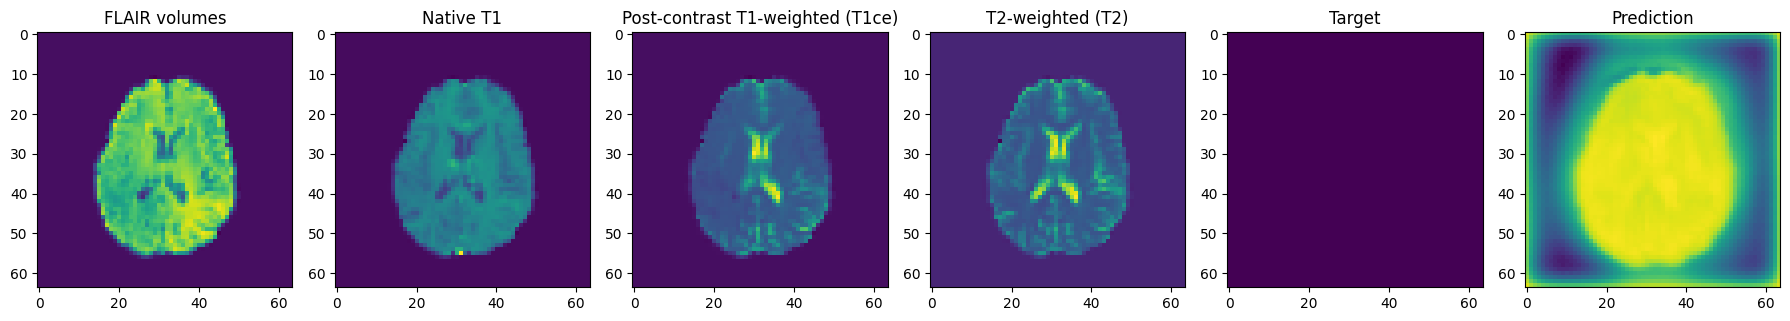

../../../results/res-glorious-dream-24/img/img_e28_b8.npy 1092.9299


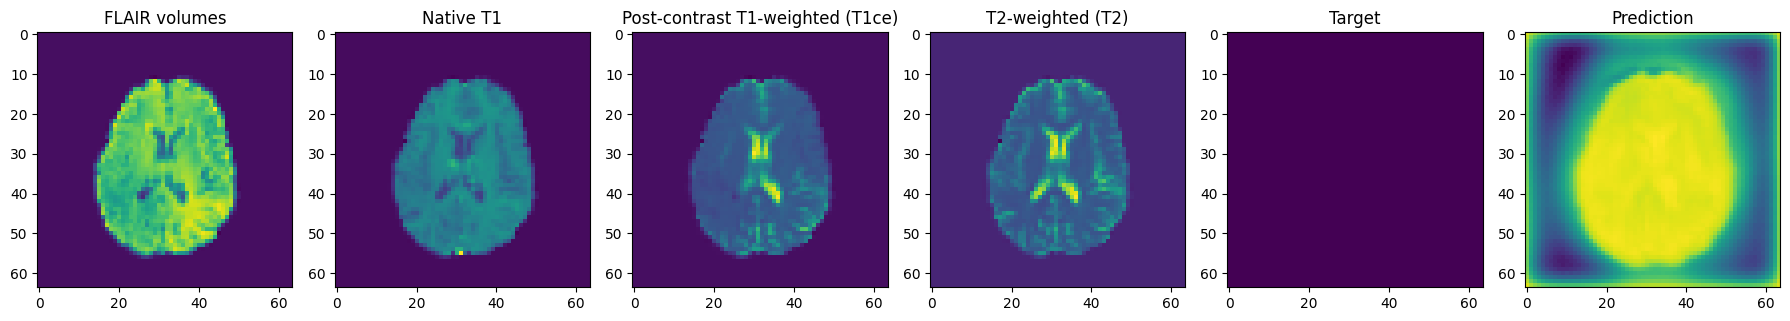

../../../results/res-glorious-dream-24/img/img_e29_b0.npy 724.2777


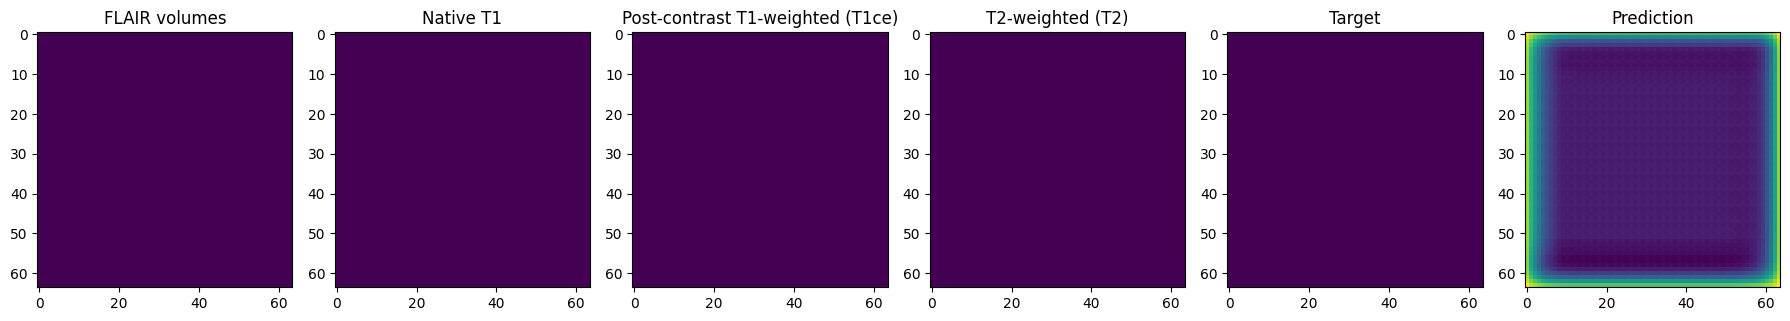

../../../results/res-glorious-dream-24/img/img_e29_b8.npy 724.2777


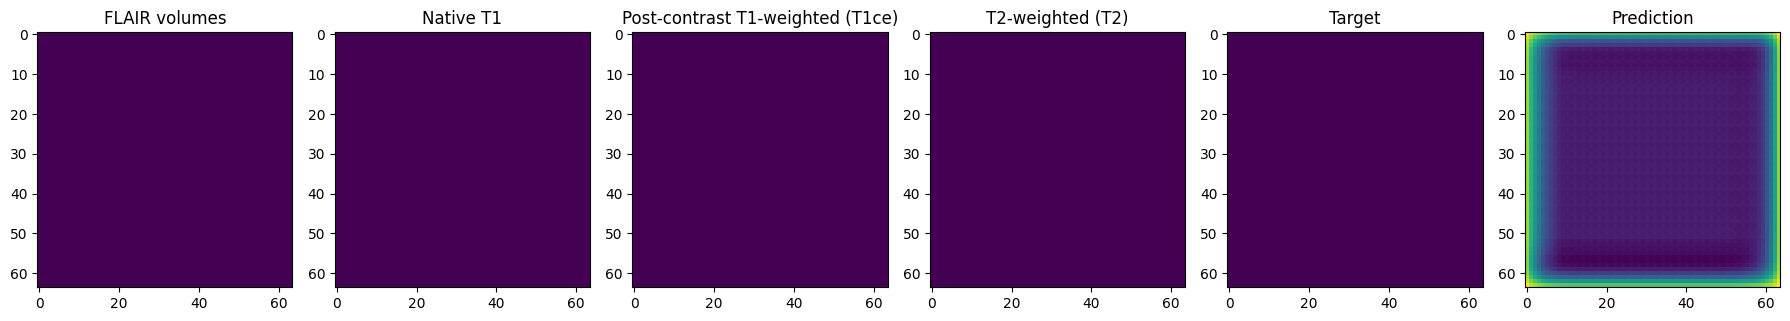

../../../results/res-glorious-dream-24/img/img_e30_b0.npy 601.48047


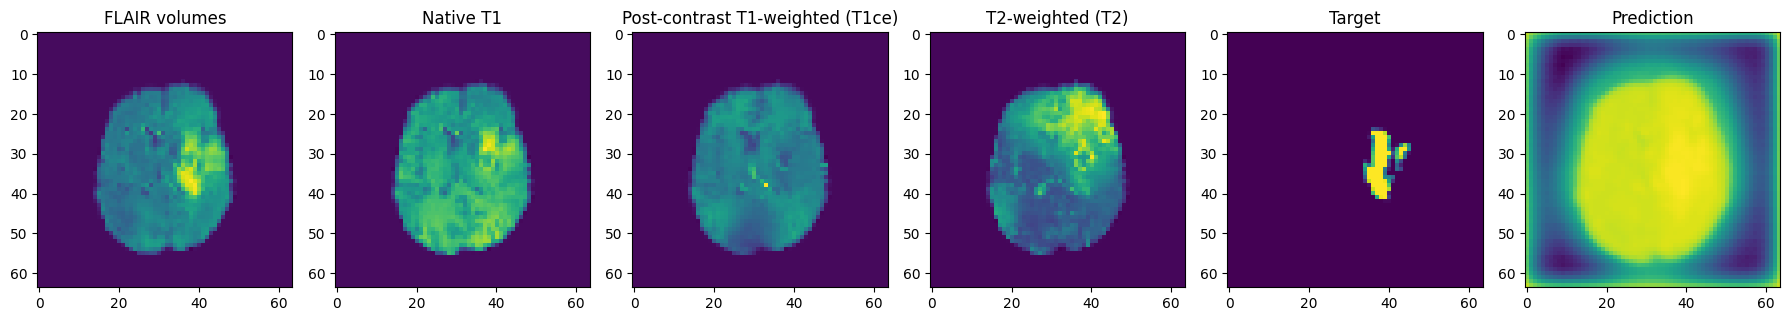

../../../results/res-glorious-dream-24/img/img_e30_b8.npy 601.48047


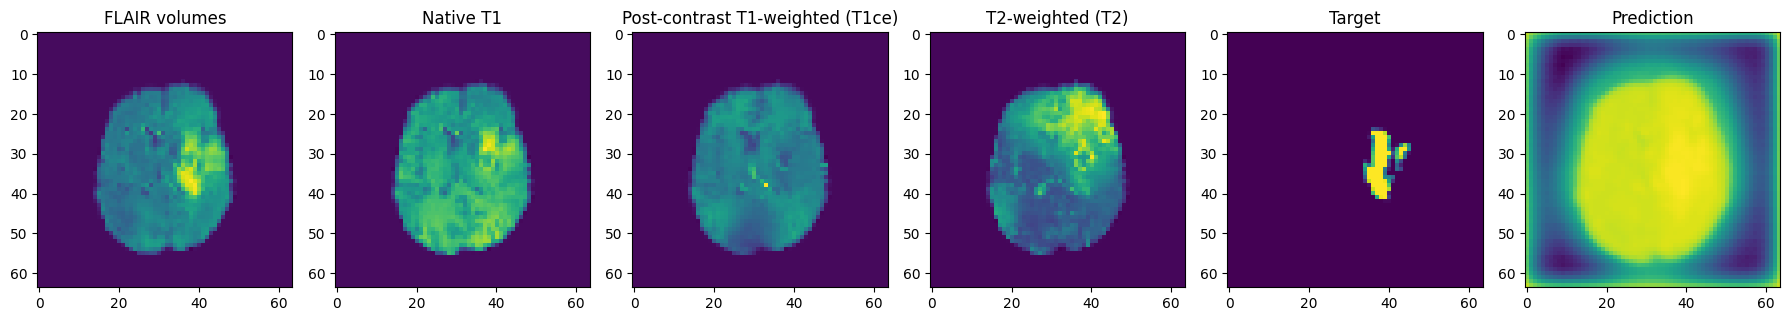

../../../results/res-glorious-dream-24/img/img_e31_b0.npy 243.06323


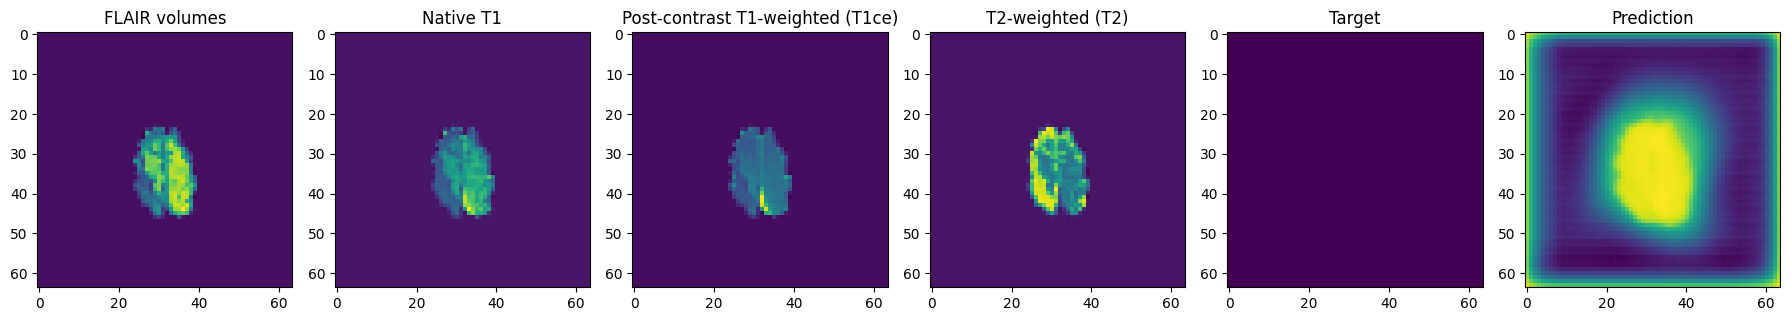

../../../results/res-glorious-dream-24/img/img_e31_b8.npy 243.06323


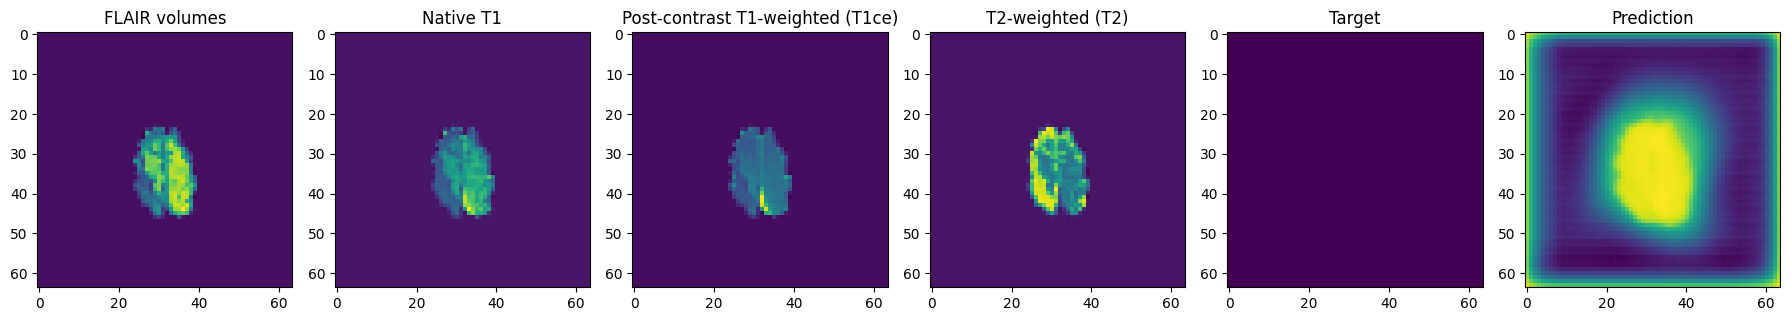

../../../results/res-glorious-dream-24/img/img_e32_b0.npy 839.0619


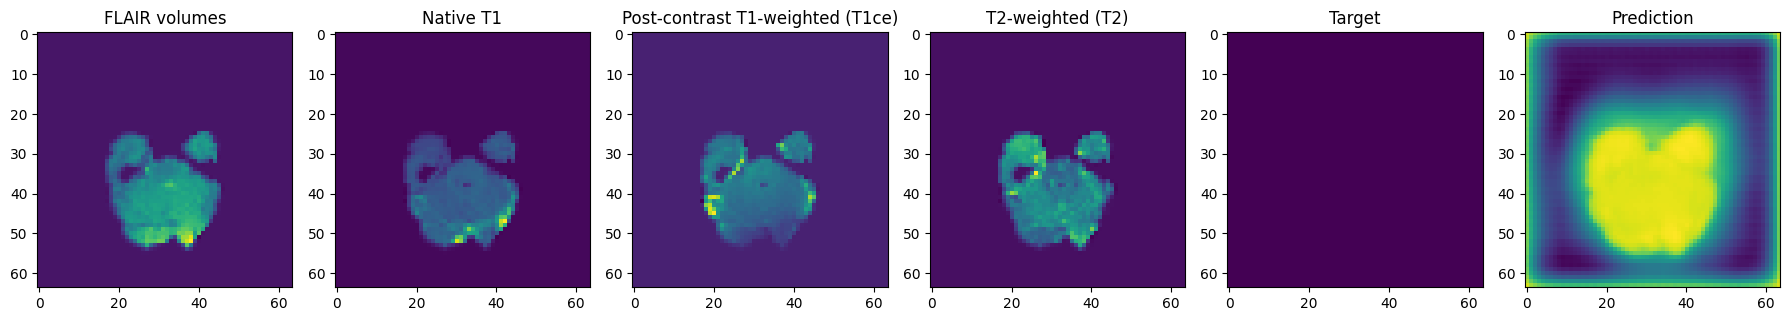

../../../results/res-glorious-dream-24/img/img_e32_b8.npy 839.0619


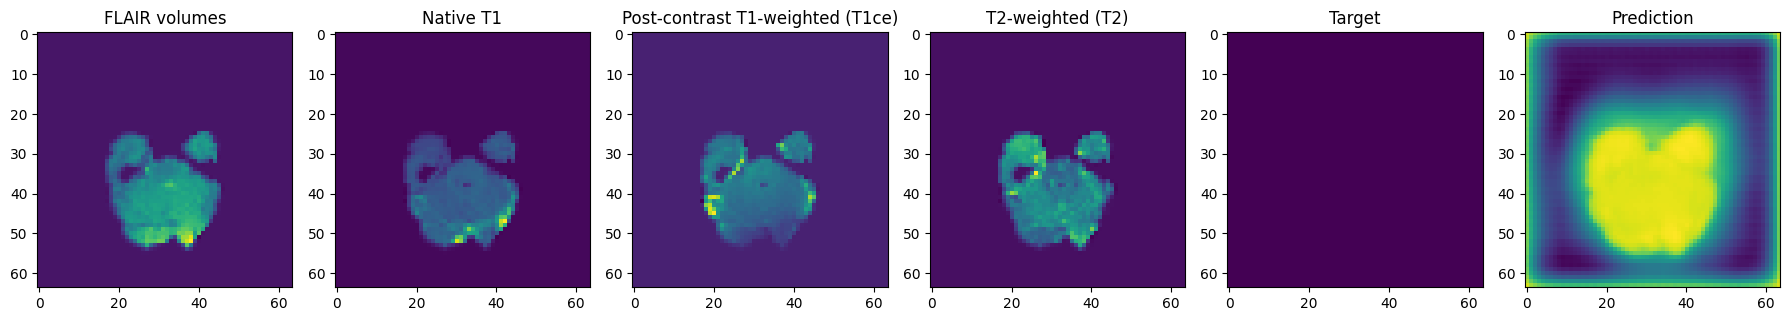

../../../results/res-glorious-dream-24/img/img_e33_b0.npy 503.41345


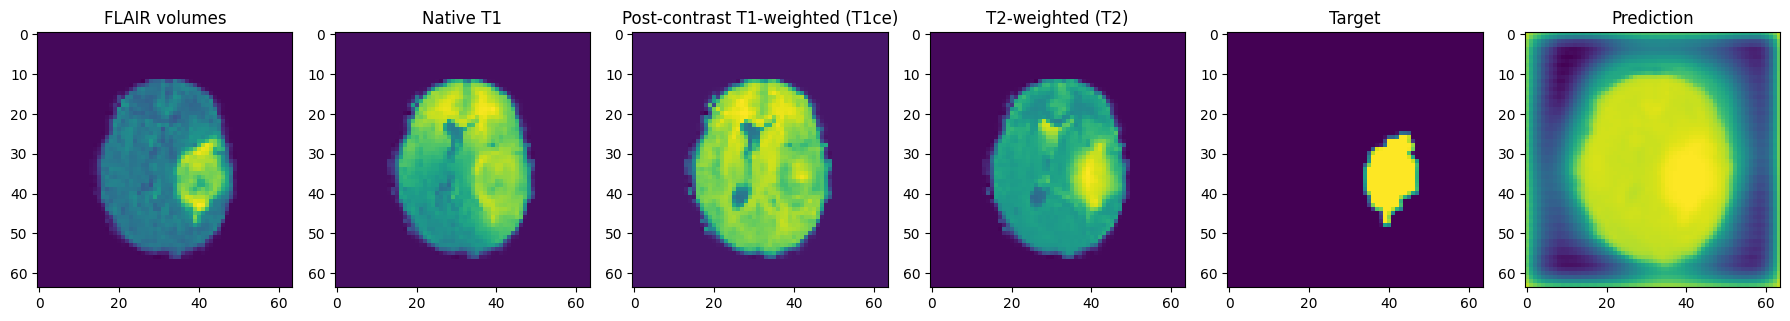

../../../results/res-glorious-dream-24/img/img_e33_b8.npy 503.41345


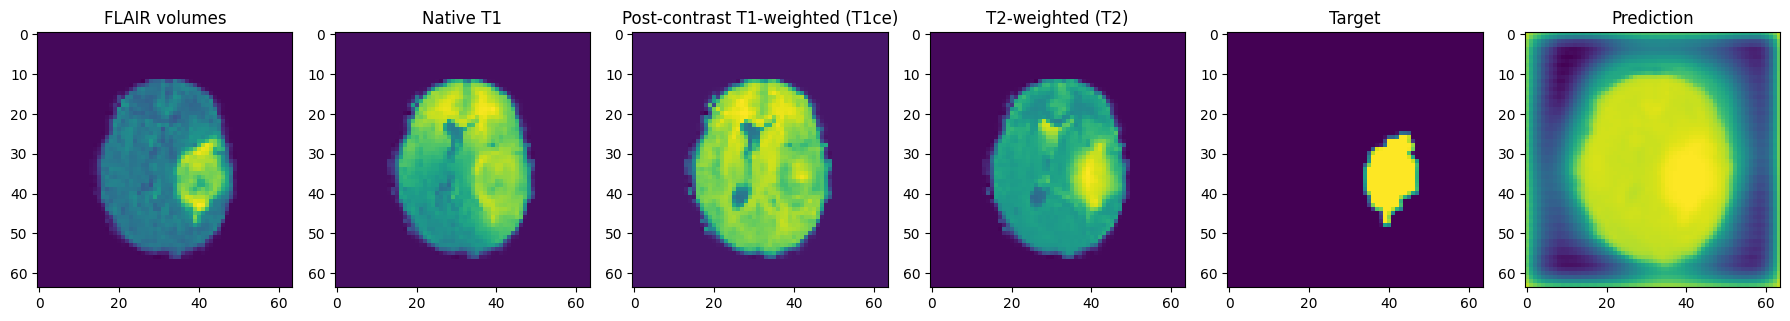

../../../results/res-glorious-dream-24/img/img_e34_b0.npy 799.3923


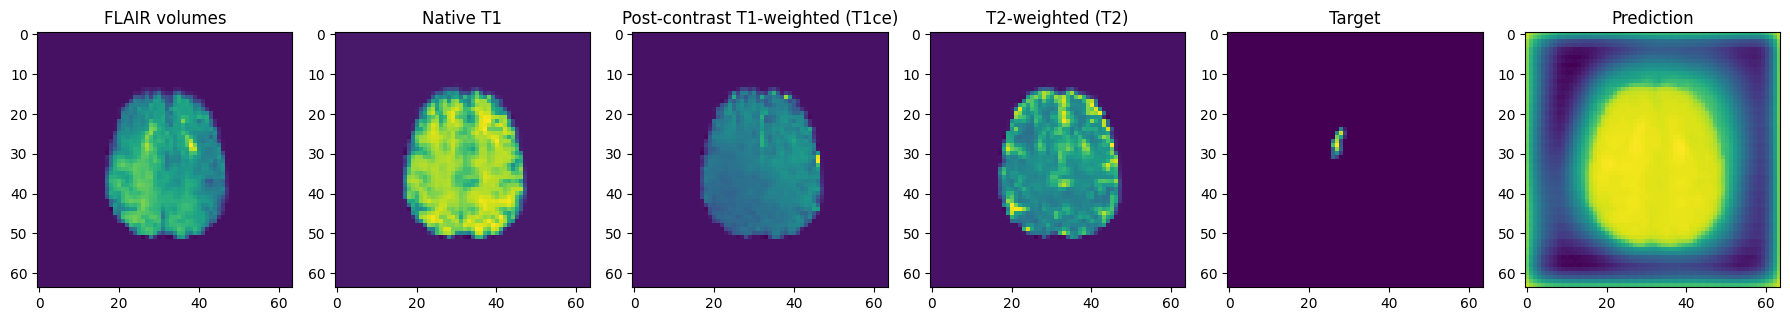

../../../results/res-glorious-dream-24/img/img_e34_b8.npy 799.3923


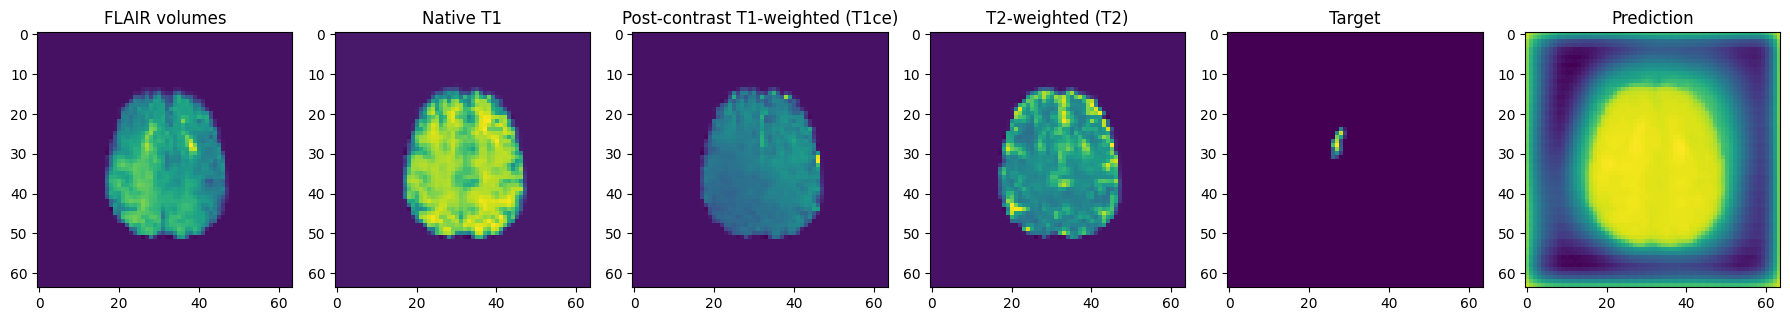

../../../results/res-glorious-dream-24/img/img_e35_b0.npy 567.90857


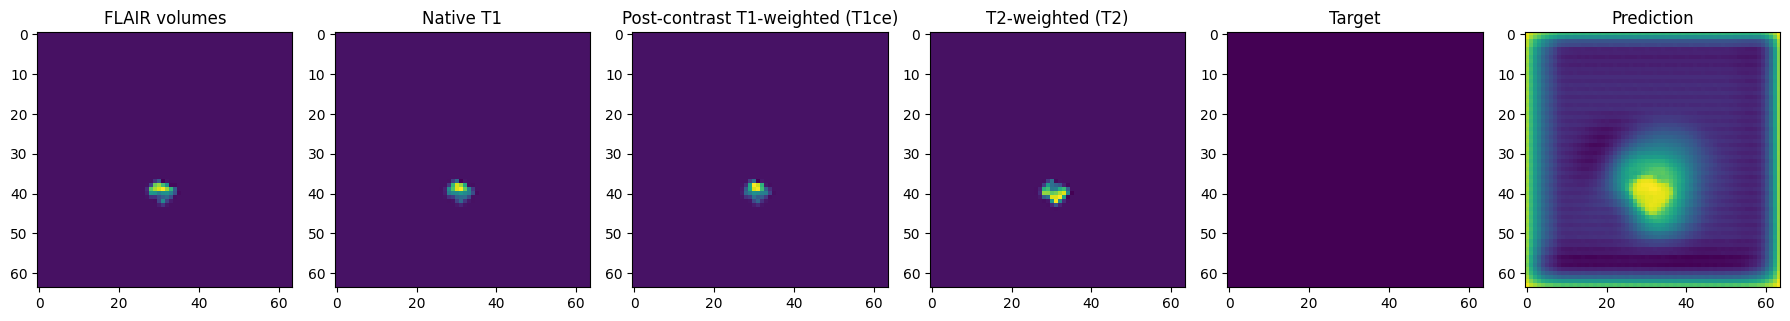

../../../results/res-glorious-dream-24/img/img_e35_b8.npy 567.90857


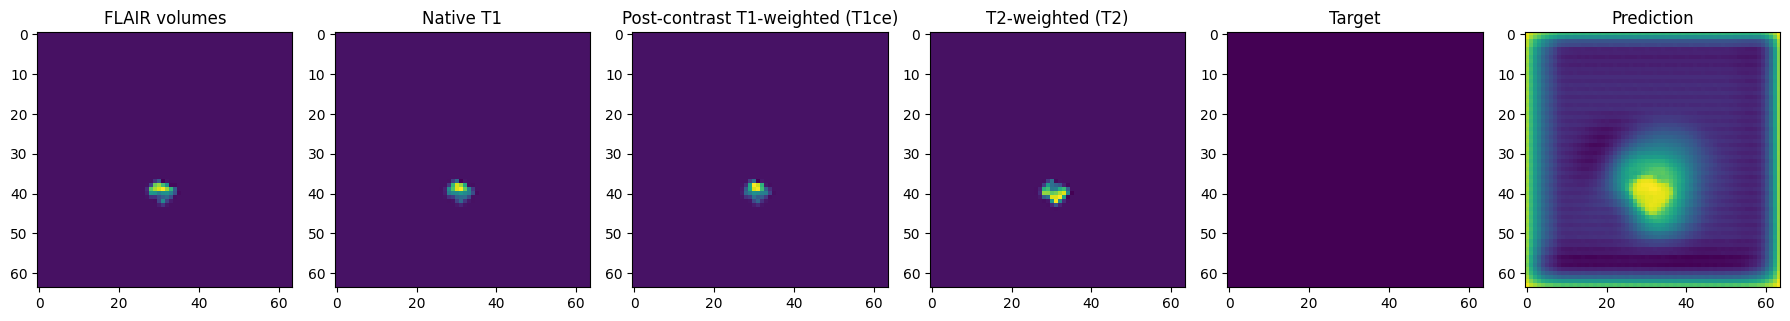

../../../results/res-glorious-dream-24/img/img_e36_b0.npy 569.0331


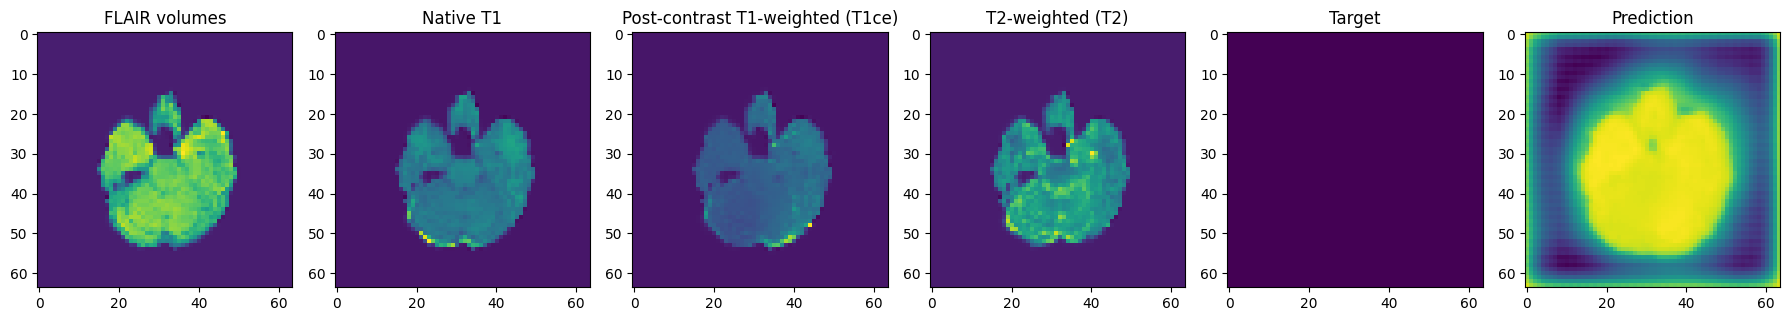

../../../results/res-glorious-dream-24/img/img_e36_b8.npy 569.0331


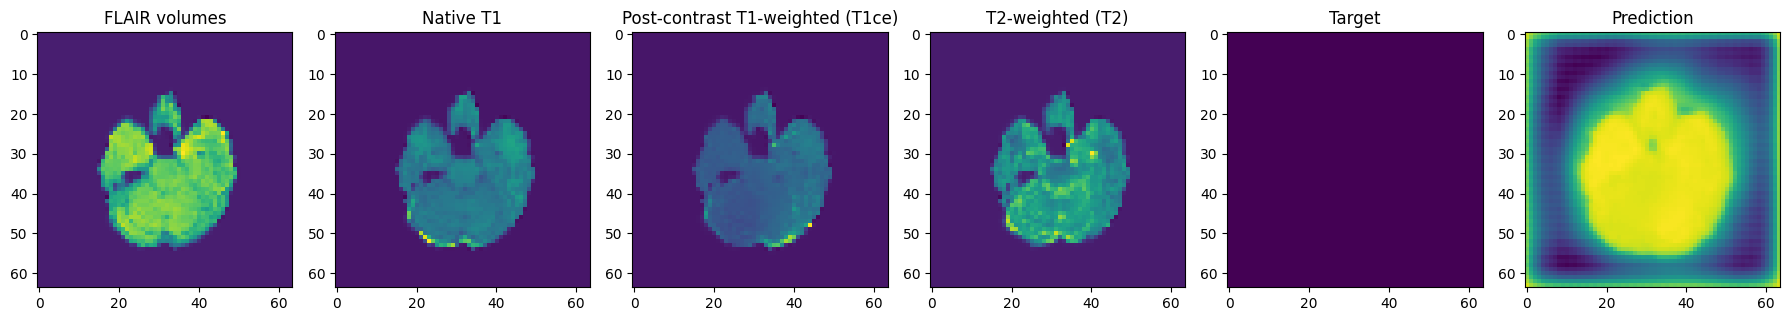

../../../results/res-glorious-dream-24/img/img_e37_b0.npy 135.23703


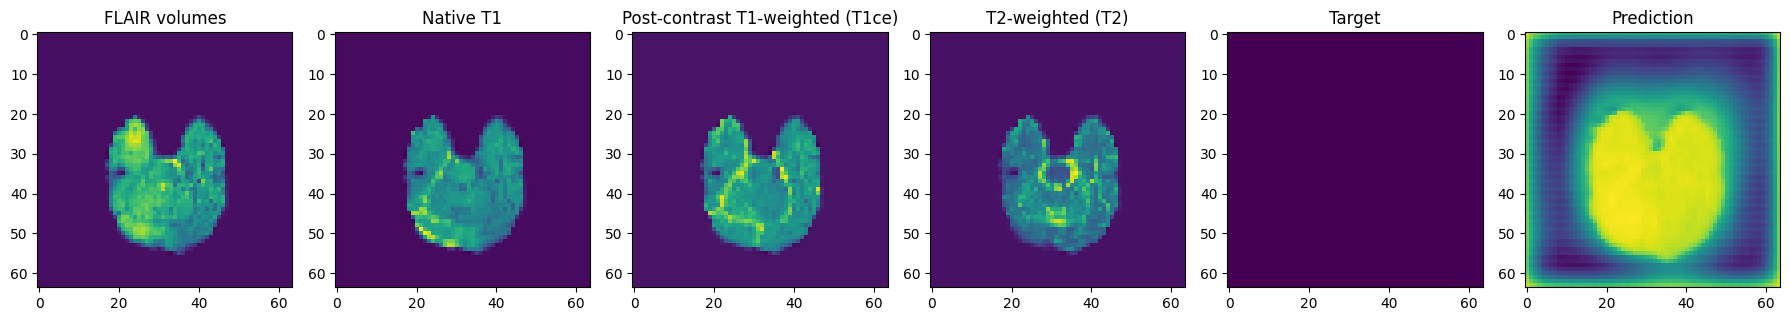

../../../results/res-glorious-dream-24/img/img_e37_b8.npy 135.23703


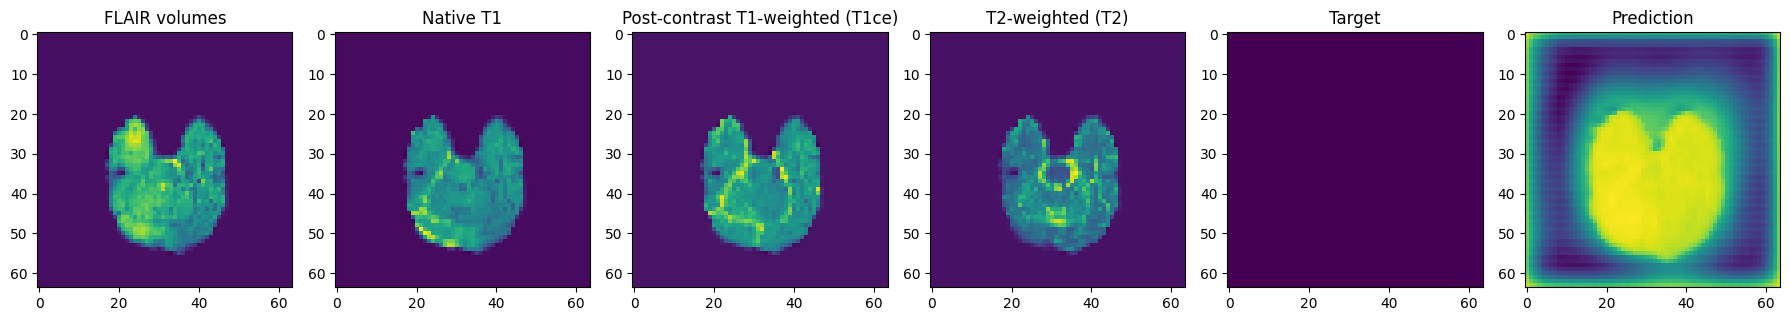

../../../results/res-glorious-dream-24/img/img_e38_b0.npy 181.1756


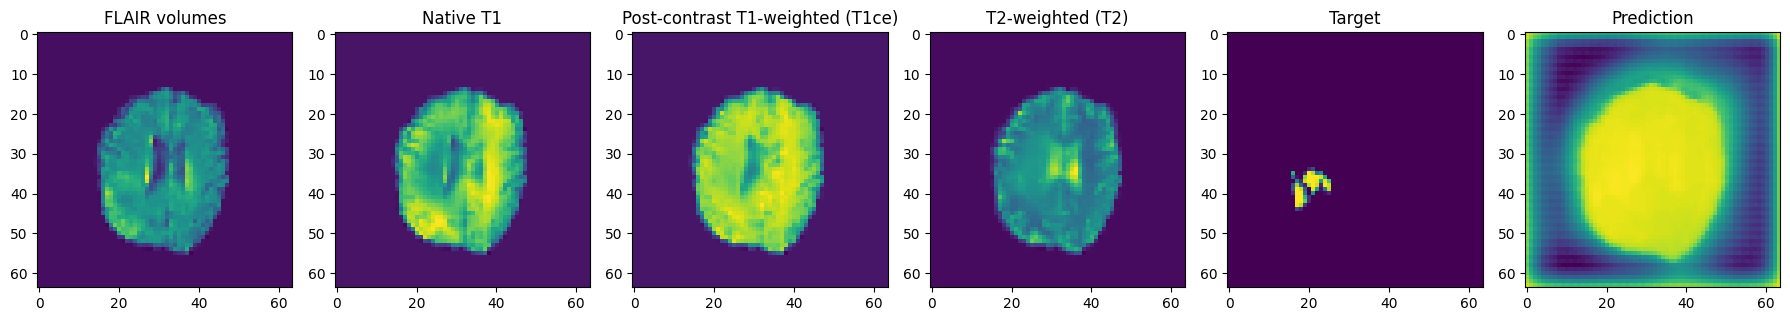

../../../results/res-glorious-dream-24/img/img_e38_b8.npy 181.1756


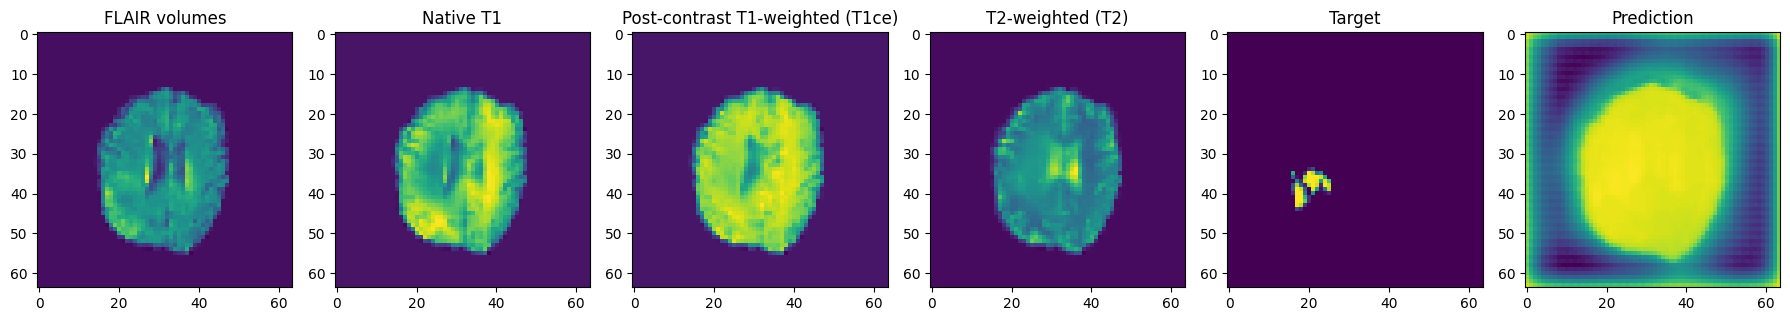

../../../results/res-glorious-dream-24/img/img_e39_b0.npy 1238.9884


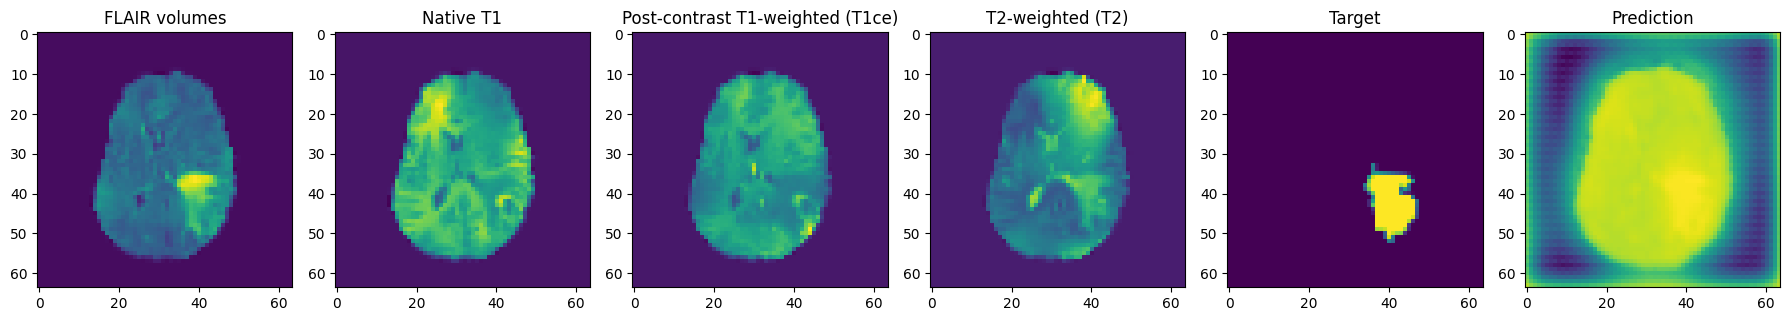

../../../results/res-glorious-dream-24/img/img_e39_b8.npy 1238.9884


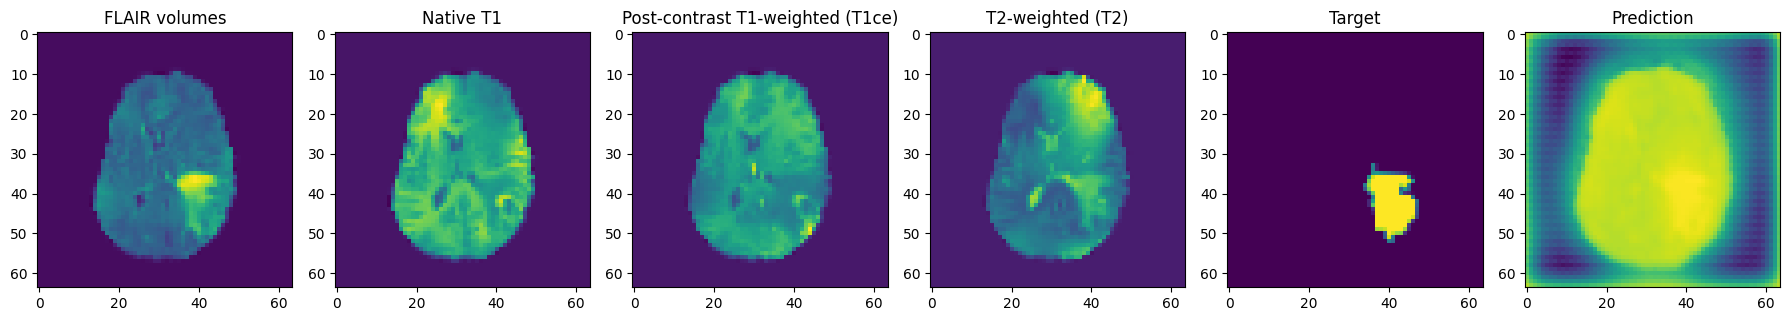

../../../results/res-glorious-dream-24/img/img_e40_b0.npy 660.4584


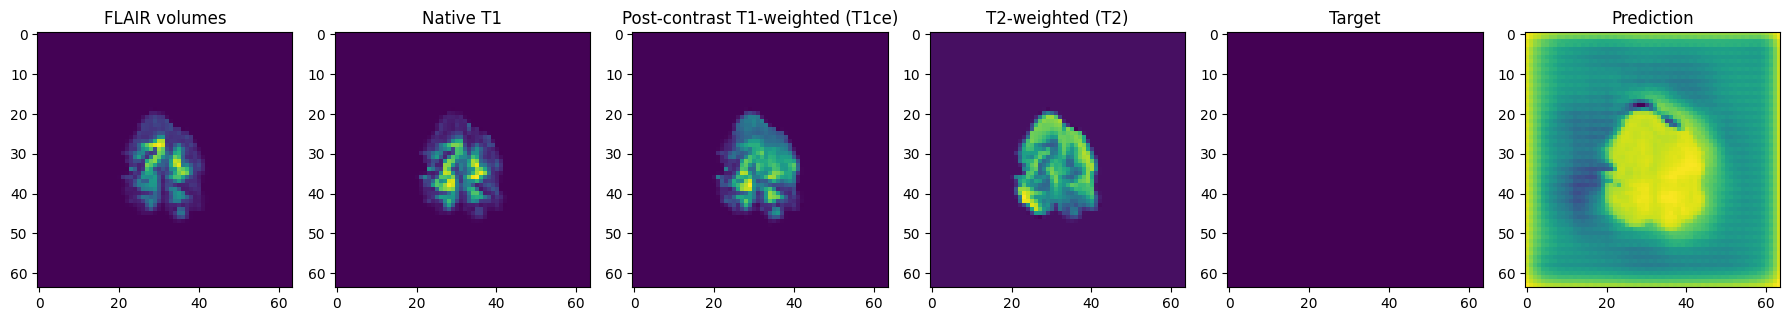

../../../results/res-glorious-dream-24/img/img_e40_b8.npy 660.4584


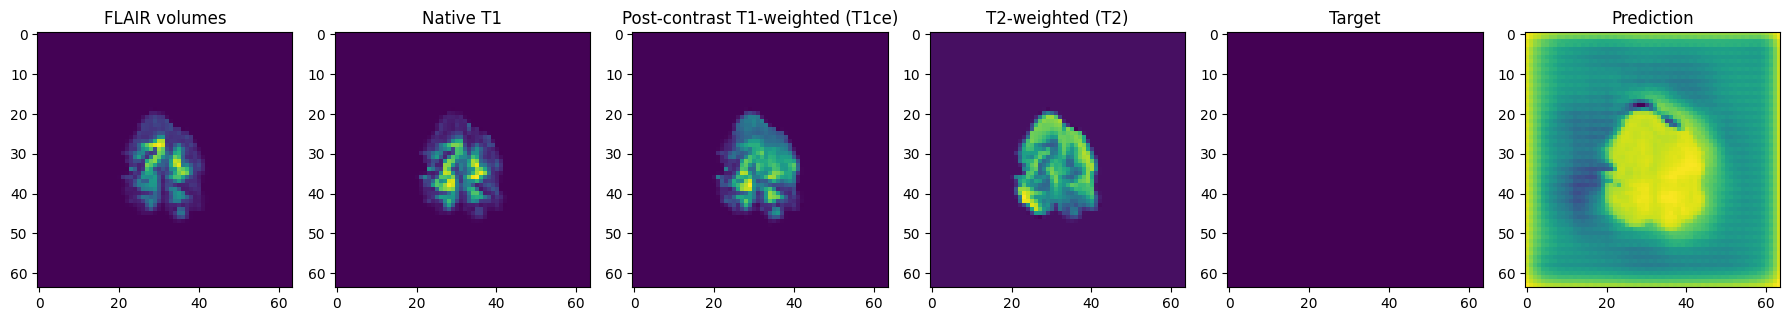

../../../results/res-glorious-dream-24/img/img_e41_b0.npy 1599.3164


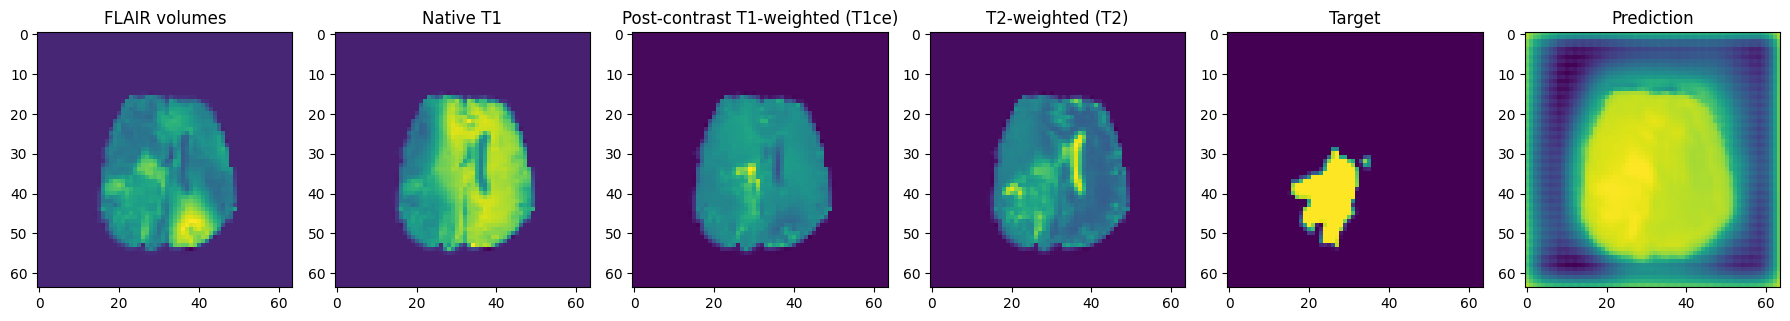

../../../results/res-glorious-dream-24/img/img_e41_b8.npy 1599.3164


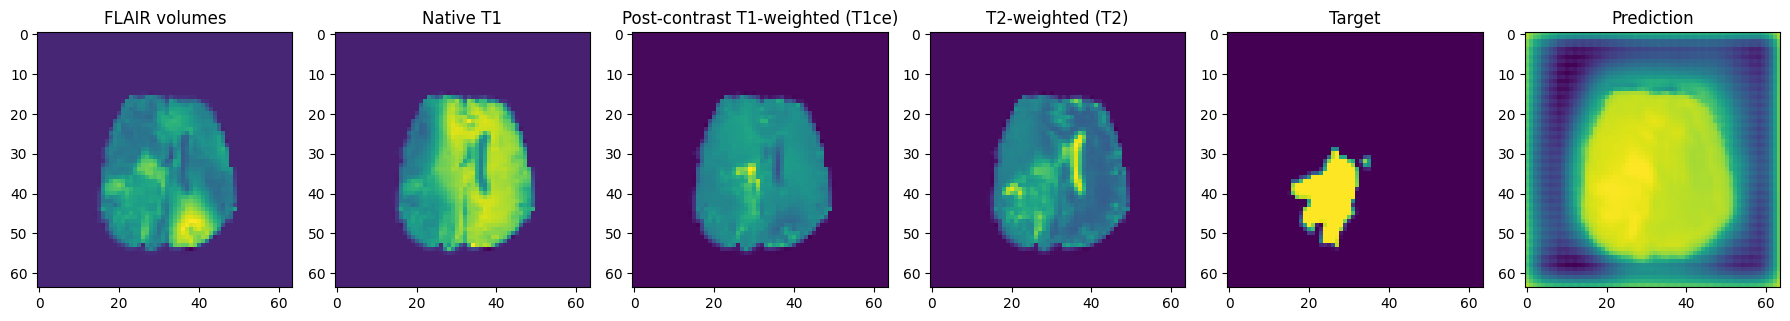

../../../results/res-glorious-dream-24/img/img_e42_b0.npy 22.717354


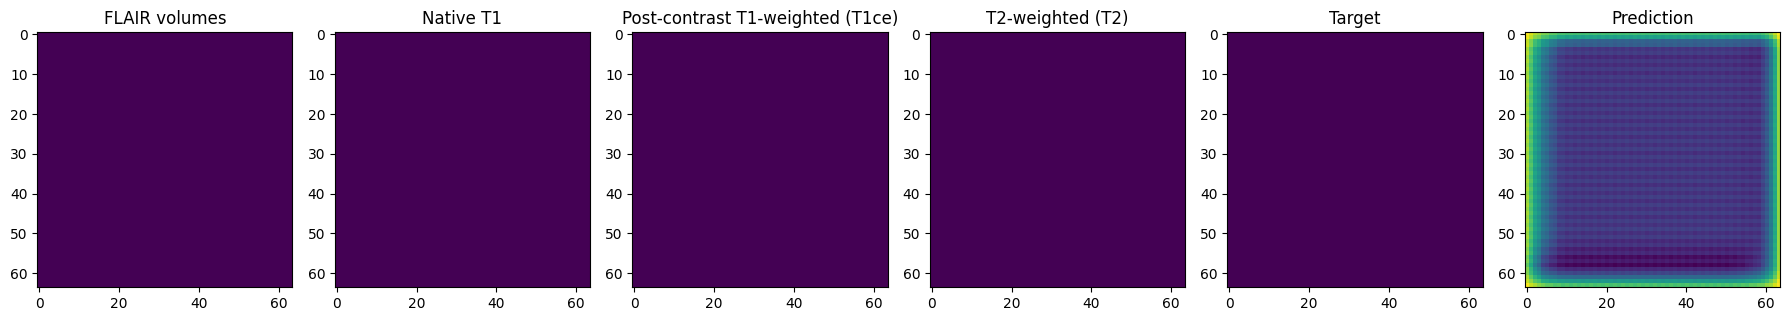

../../../results/res-glorious-dream-24/img/img_e42_b8.npy 22.717354


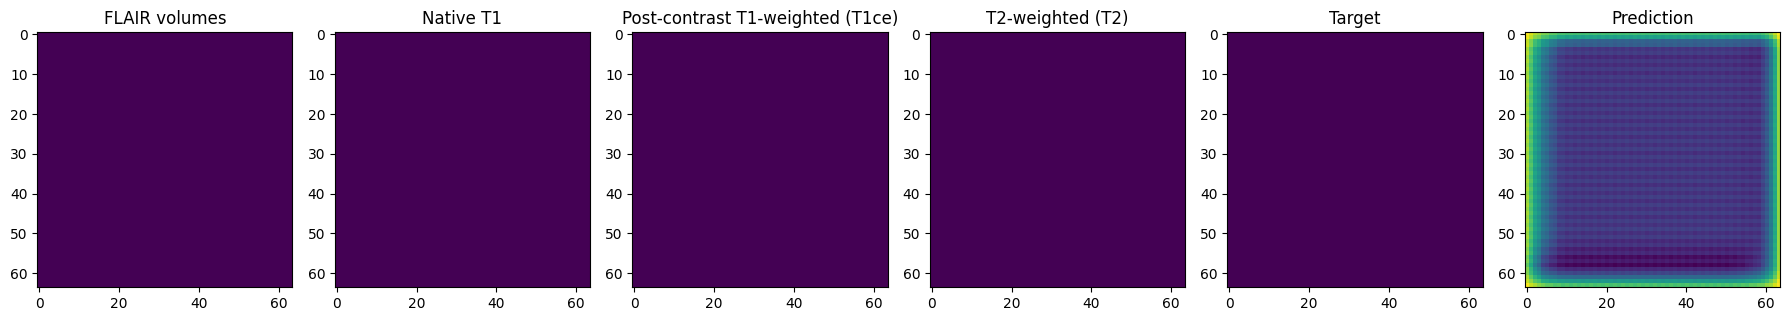

../../../results/res-glorious-dream-24/img/img_e43_b0.npy 807.24677


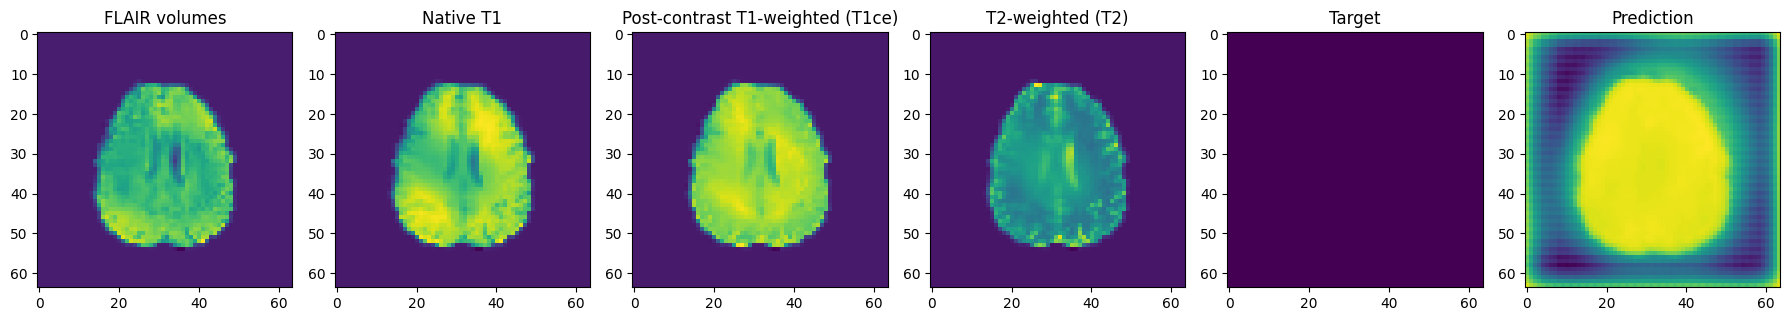

../../../results/res-glorious-dream-24/img/img_e43_b8.npy 807.24677


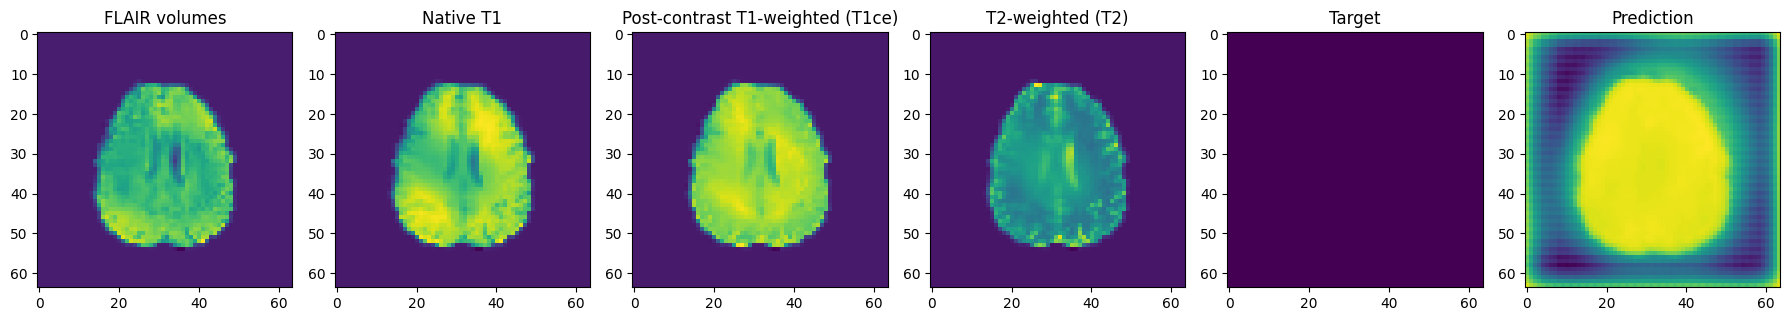

../../../results/res-glorious-dream-24/img/img_e44_b0.npy 983.73175


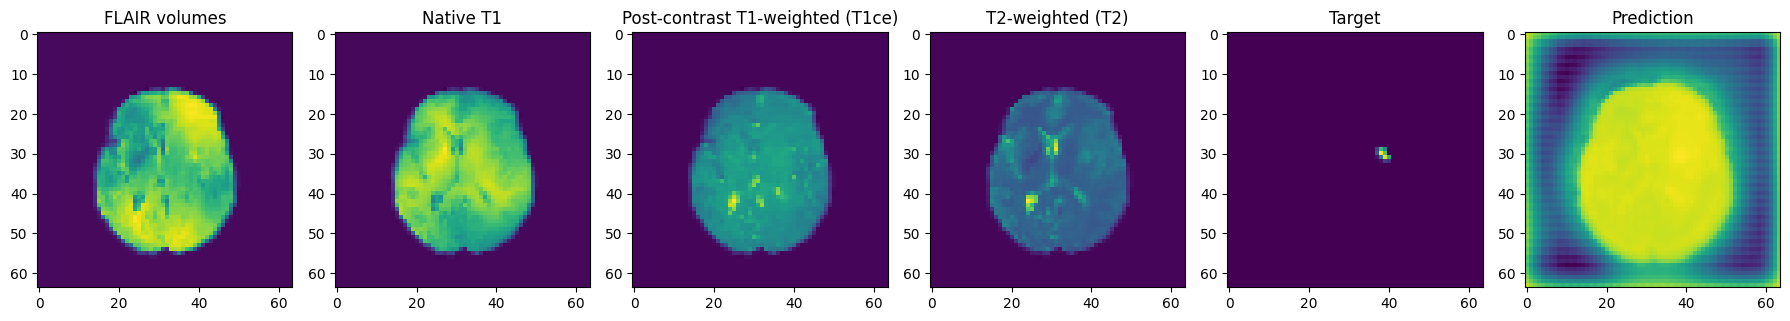

../../../results/res-glorious-dream-24/img/img_e44_b8.npy 983.73175


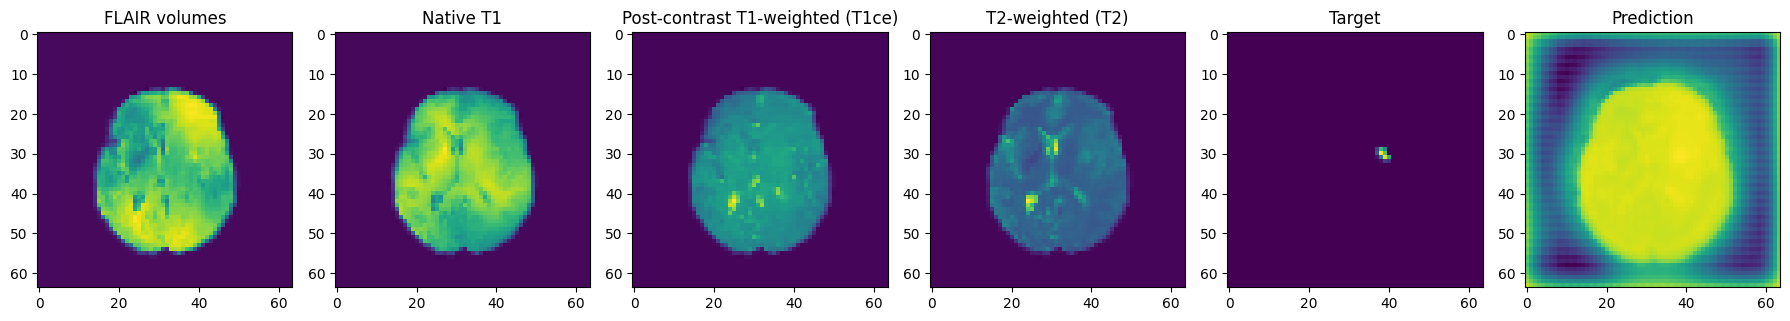

../../../results/res-glorious-dream-24/img/img_e45_b0.npy 1484.3962


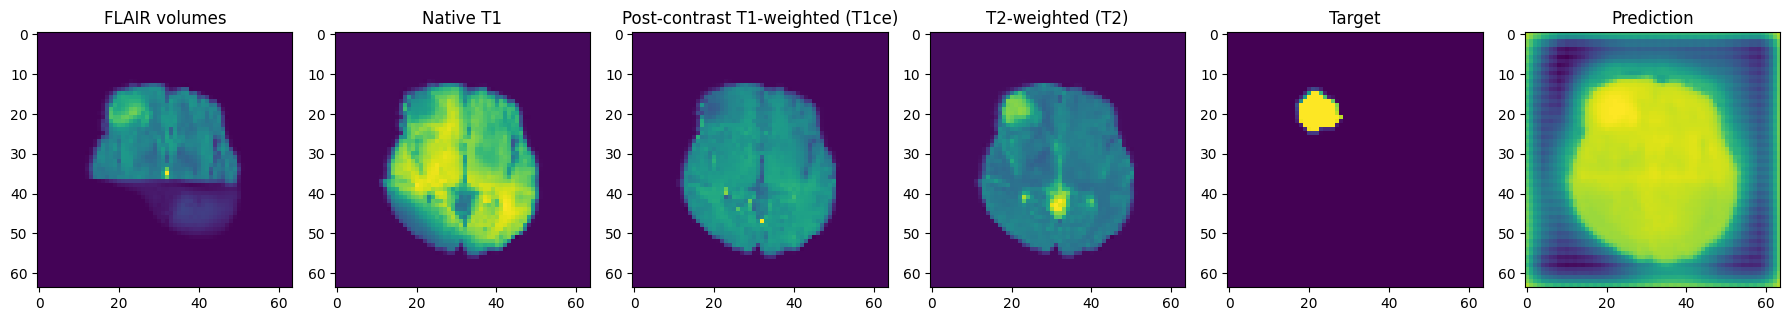

../../../results/res-glorious-dream-24/img/img_e45_b8.npy 1484.3962


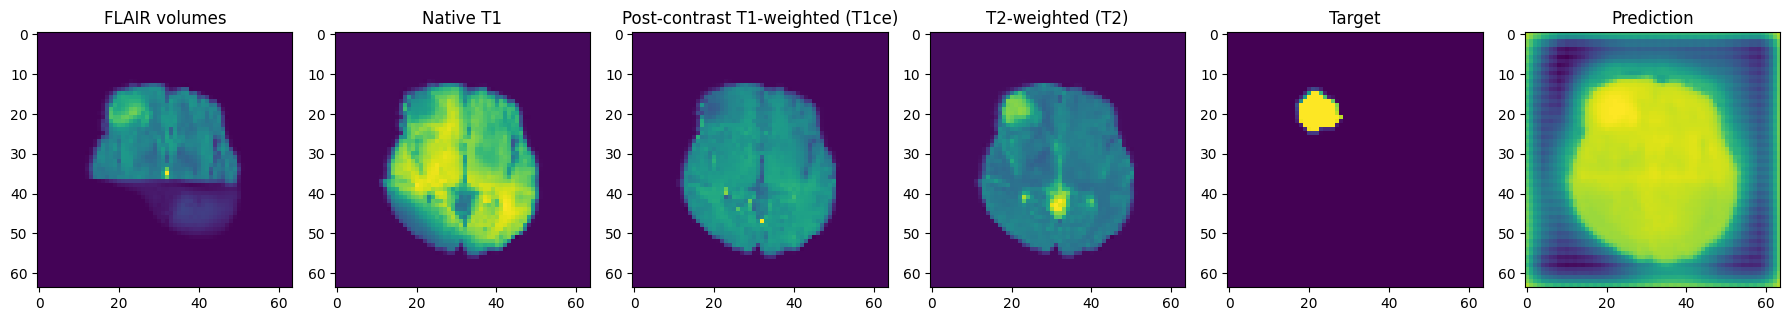

../../../results/res-glorious-dream-24/img/img_e46_b0.npy 449.31866


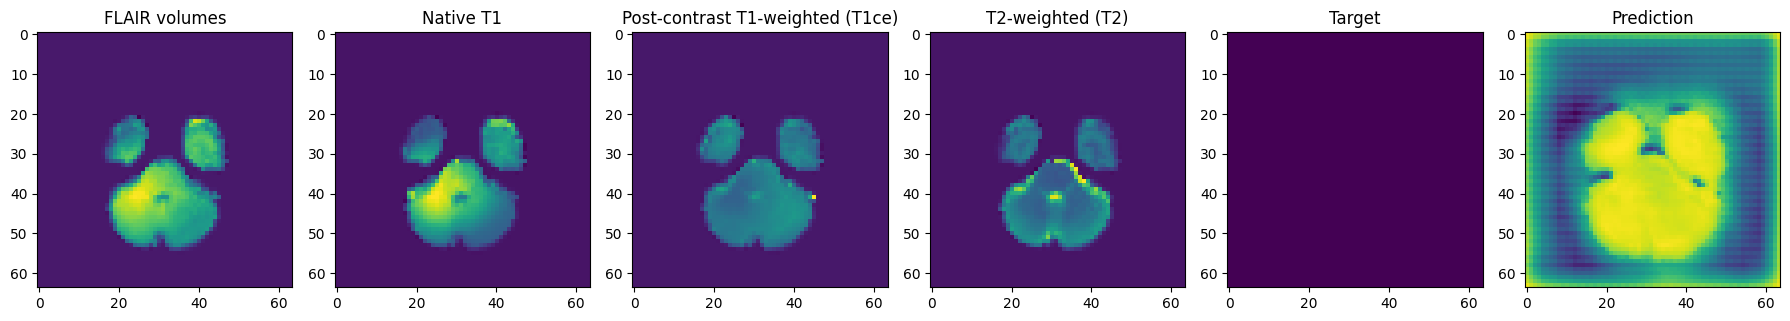

../../../results/res-glorious-dream-24/img/img_e46_b8.npy 449.31866


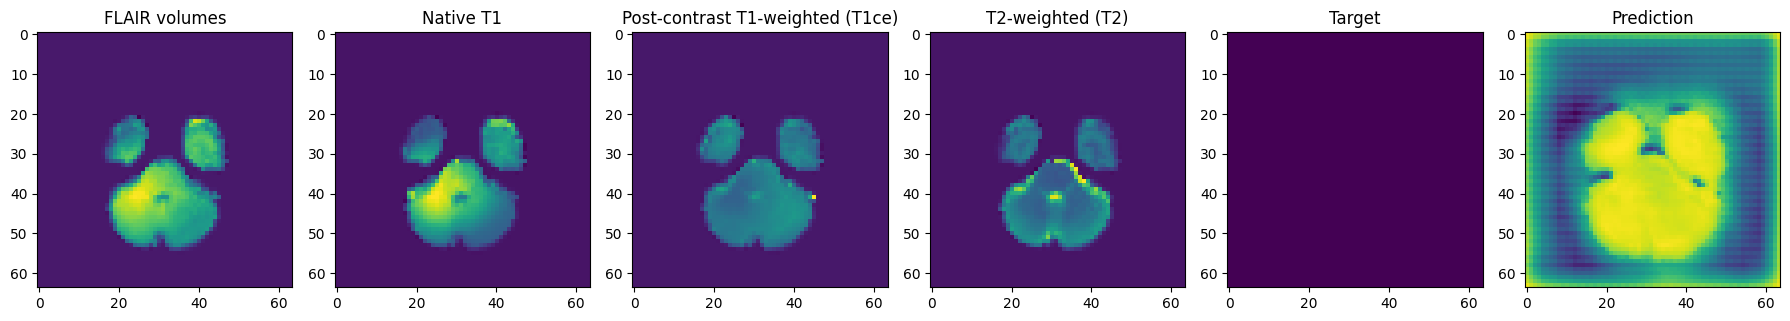

../../../results/res-glorious-dream-24/img/img_e47_b0.npy 849.12616


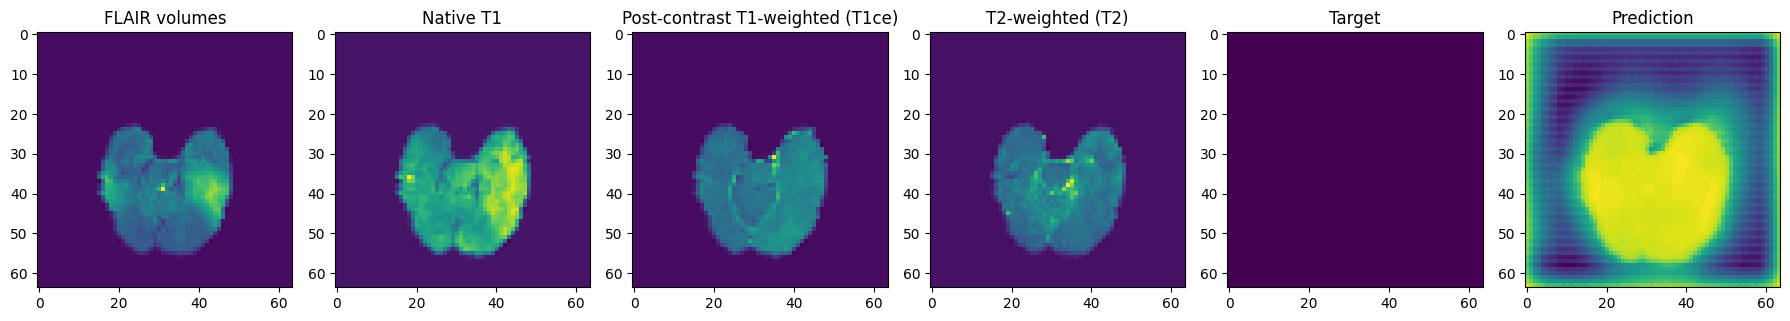

../../../results/res-glorious-dream-24/img/img_e47_b8.npy 849.12616


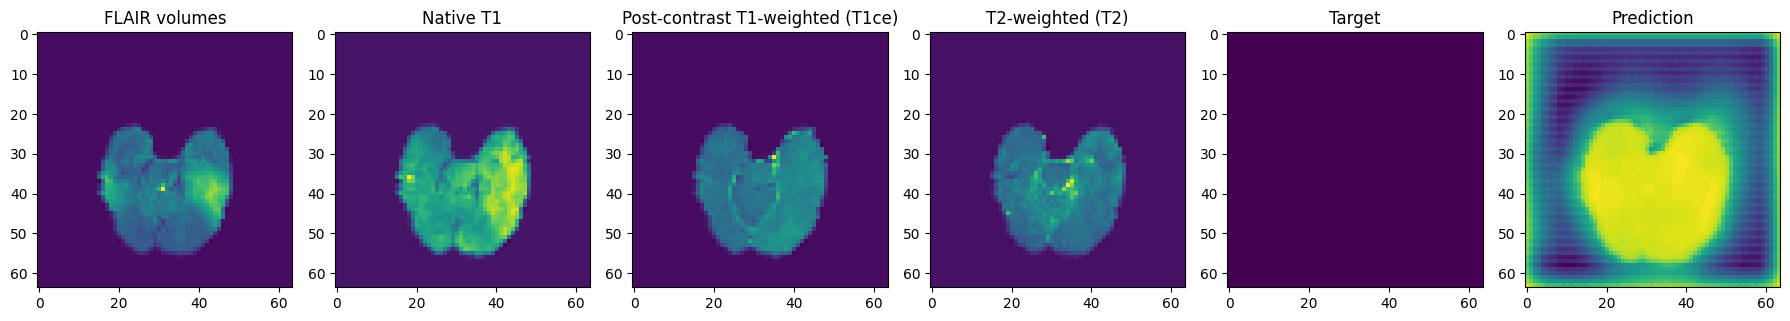

../../../results/res-glorious-dream-24/img/img_e48_b0.npy 918.2525


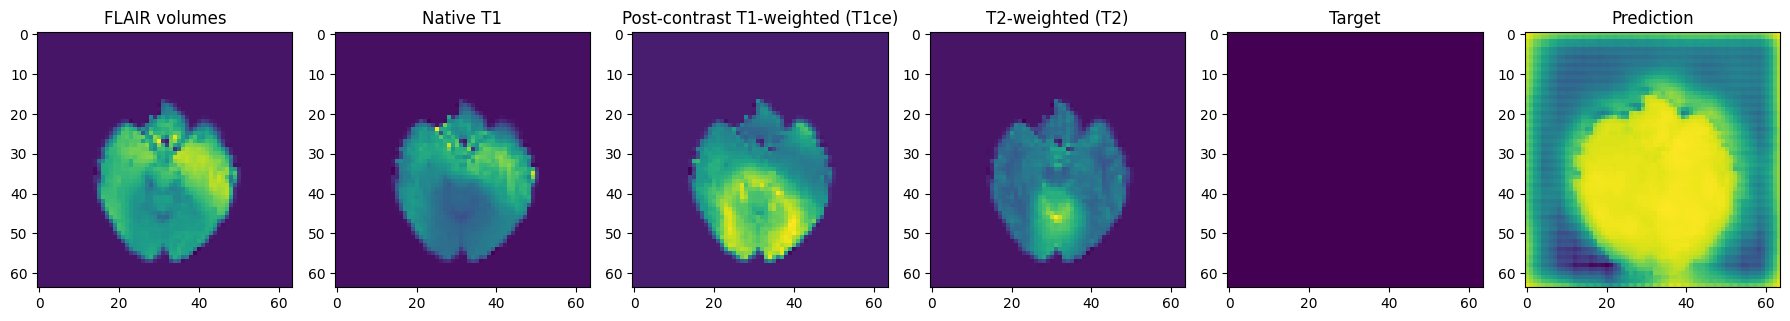

../../../results/res-glorious-dream-24/img/img_e48_b8.npy 918.2525


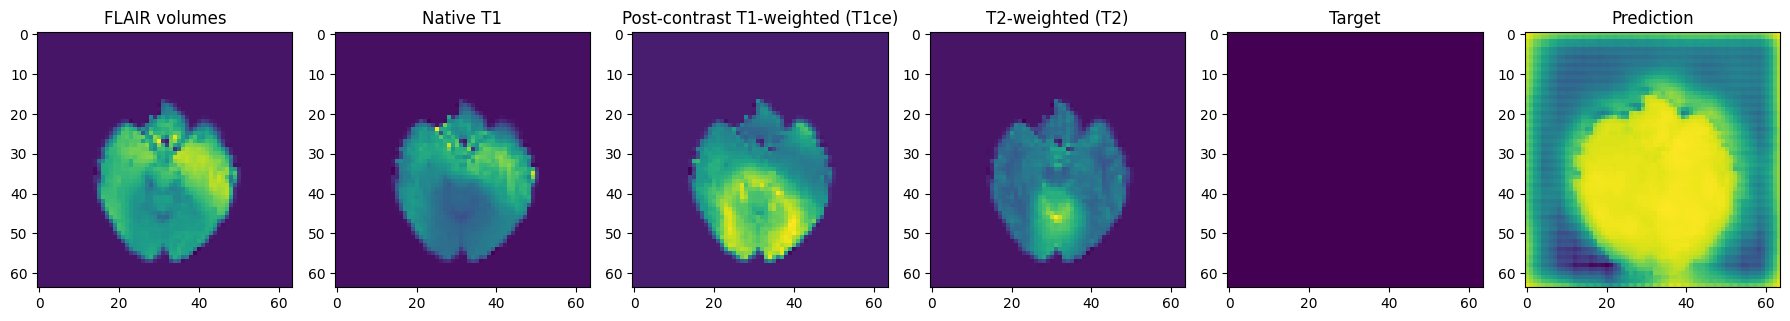

../../../results/res-glorious-dream-24/img/img_e49_b0.npy 477.9033


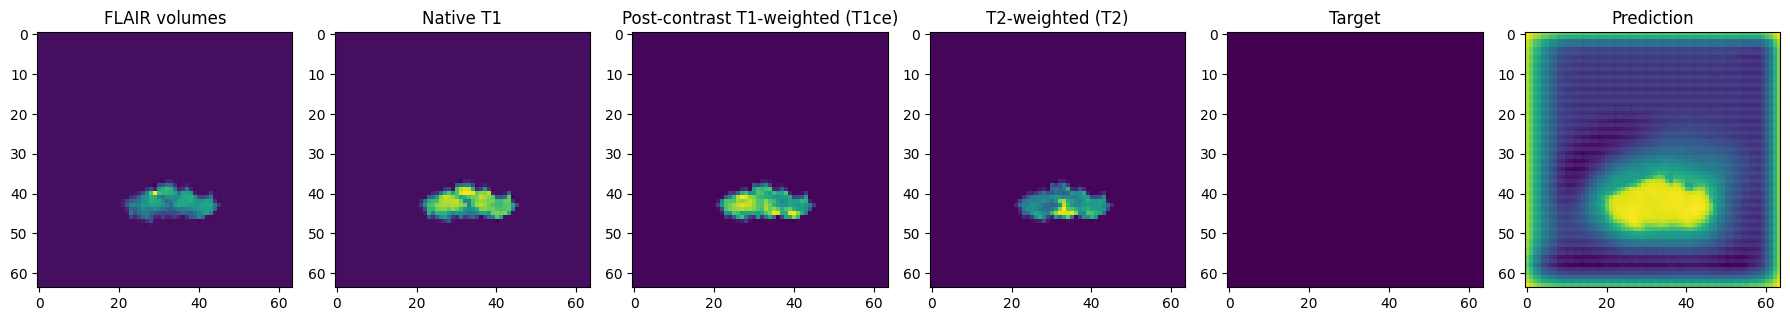

../../../results/res-glorious-dream-24/img/img_e49_b8.npy 477.9033


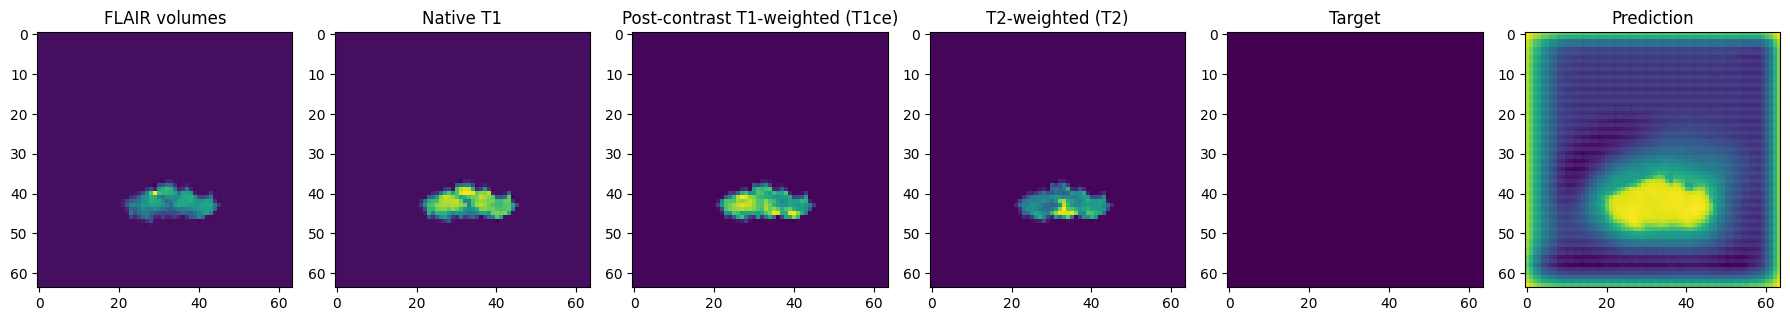

../../../results/res-glorious-dream-24/img/img_e50_b0.npy 429.37784


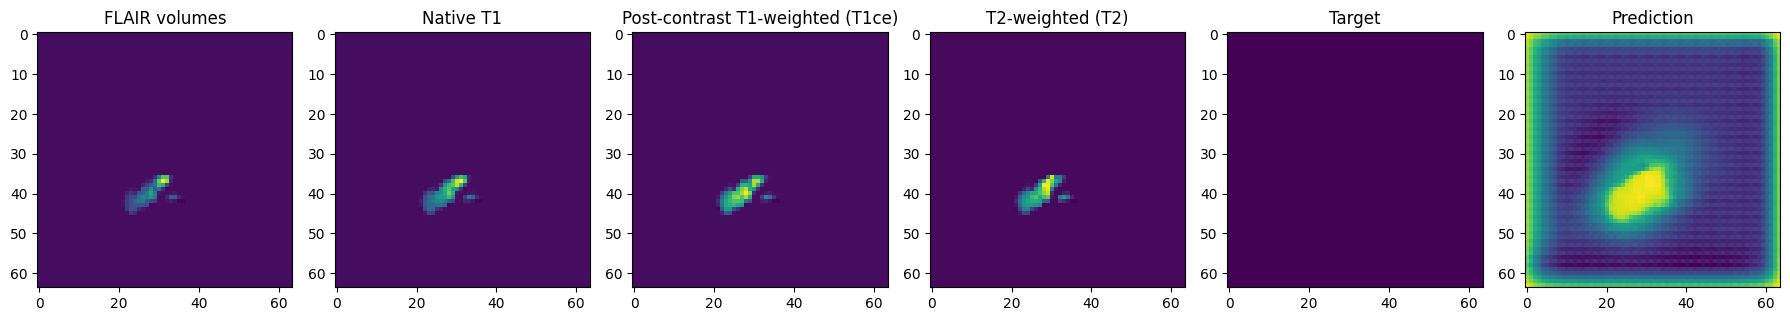

../../../results/res-glorious-dream-24/img/img_e50_b8.npy 429.37784


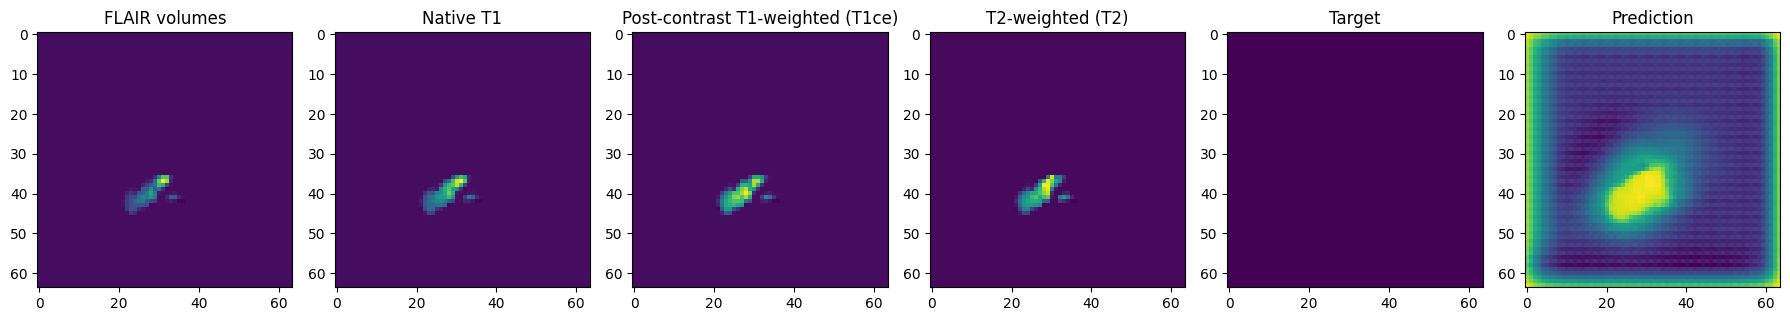

../../../results/res-glorious-dream-24/img/img_e51_b0.npy 1080.3795


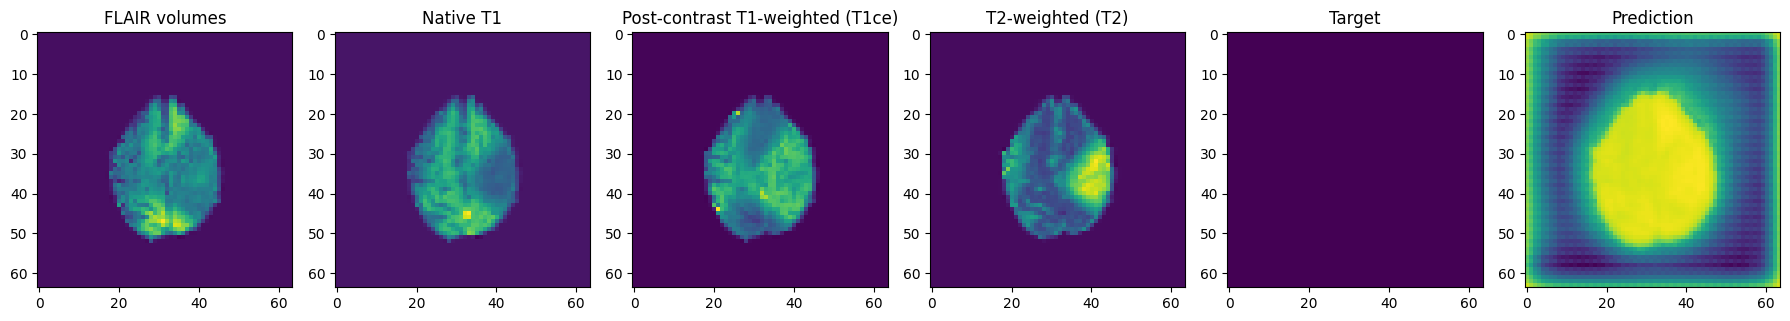

../../../results/res-glorious-dream-24/img/img_e51_b8.npy 1080.3795


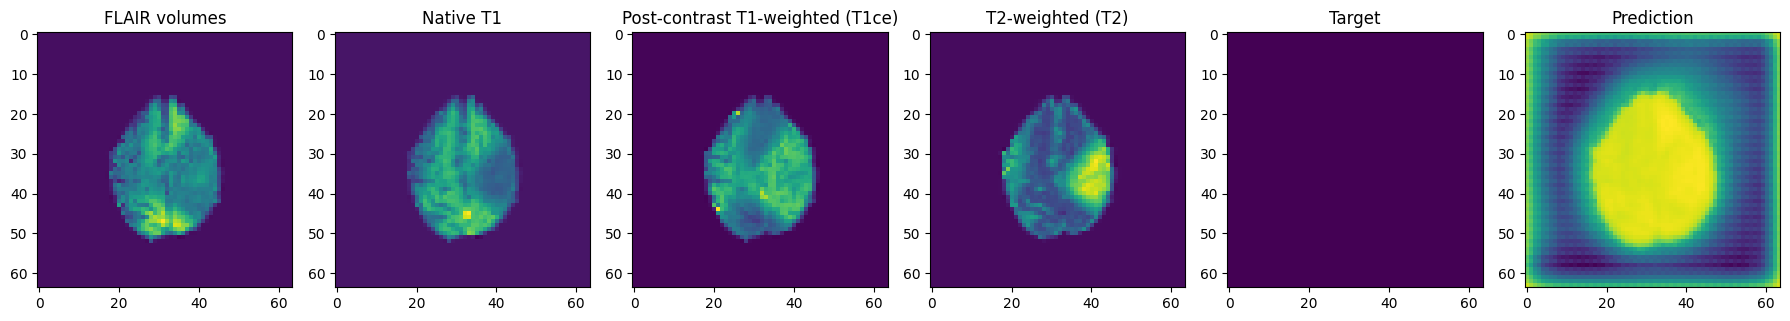

In [19]:
# path = Path("../../../results/res-smart-hill-15") # learning rate - 0.001
# path = Path("../../../results/res-charmed-oath-14") # learning rate - 0.0001
# path = Path("../../../results/res-ethereal-wave-16") # learning rate - 0.001 + dropout
# path = Path("../../../results/res-blooming-sea-17") # learning rate - 0.0001 + dropout
# path = Path("../../../results/res-toasty-snowflake-18") # learning rate - 0.005 + dropout
# path = Path("../../../results/res-resilient-planet-21") # learning rate - 0.0001 + dropout + affine
path = Path("../../../results/res-glorious-dream-24") # learning rate - 0.0001 + dropout + elastic


img = sorted(list(path.glob("img" + "/*")), key=custom_sort_key)
target = sorted(list(path.glob("target" + "/*")), key=custom_sort_key)
pred = sorted(list(path.glob("pred" + "/*")), key=custom_sort_key)
print(type(pred), len(pred), np.load(img[0]).shape)

print(len(img),  len(target), len(pred))

for i in range(8, len(img), 8):
    np_img = np.load(img[i])
    np_tar = np.load(target[i])
    np_pred = np.load(pred[i])
    # print(np_img.shape, np_tar.shape, np_pred.shape)
    if np_tar.sum() > 0:
        print(img[i], np_tar.sum())
        fig, axs = plt.subplots(1, 6, figsize=(18, 18))
        axs[0].imshow(np_img[0, 0, :, :])#, vmin=np.min(cur_im.flatten()), vmax=np.max(cur_im.flatten()))#,cmap='gray')
        axs[0].set_title('FLAIR volumes')
        axs[1].imshow(np_img[0, 1, :, :])#, vmin=np.min(cur_im.flatten()), vmax=np.max(cur_im.flatten()))#,cmap='gray')
        axs[1].set_title('Native T1')
        axs[2].imshow(np_img[0, 2, :, :])#, vmin=np.min(cur_im.flatten()), vmax=np.max(cur_im.flatten()))#,cmap='gray')
        axs[2].set_title('Post-contrast T1-weighted (T1ce)')
        axs[3].imshow(np_img[0, 3, :, :])#, vmin=np.min(cur_im.flatten()), vmax=np.max(cur_im.flatten()))#,cmap='gray')
        axs[3].set_title('T2-weighted (T2)')
        axs[4].imshow(np_tar[0, 0, :, :])
        axs[4].set_title('Target')
        axs[5].imshow(np_pred[0, 0, :, :])#, vmin=np.min(cur_im.flatten()), vmax=np.max(cur_im.flatten()))#,cmap='gray')
        axs[5].set_title('Prediction')
        plt.tight_layout()
        plt.show()
